Středa 9:15

Tým B

Členové: David Brablc, Vojtěch Kučík, Lukáš Kočí, Lukas Janetschek

# Rain prediction in Australia - clustering

# Introduction

### 1. Describe the business value of addressing this problem with machine learning.

The ability to predict rain for tomorrow based on the weather observations the day before would bring significant business value in several ways: 

- Agriculture Planning and Optimization: Accurate weather predictions can help farmers make informed decisions about planting, irrigating, and harvesting crops, leading to more efficient use of resources and potentially higher yields.

- Water Resource Management: By forecasting rain, water authorities can better manage water supply for cities and rural areas, optimizing the storage and distribution of water resources.

- Transportation and Logistics: Weather predictions are crucial for air travel, shipping, and road transport, affecting scheduling and routing decisions. Accurate forecasts can minimize weather-related delays and improve safety.

- Disaster Preparedness and Response: Early warnings about extreme weather conditions can mitigate the impact of natural disasters, allowing for timely evacuations and preparations, thus saving lives and reducing economic losses.

### 2. Provide the link to the source of the data.

Link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download

### 3. Describe chosen customization: target attribute, an instance of interest, attribute of interest, cost matrix.

- Target Attribute: The target attribute for our classification and clustering problem is RainTomorrow. This attribute indicates whether it rained the next day ("Yes" or "No"), which is the outcome we aim to predict using other features in the dataset.

- Instance of interest: We will choose the instance of interest randomly

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, confusion_matrix, classification_report, silhouette_score, rand_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import resample
import warnings
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'DejaVu Sans'


In [181]:
rain_df = pd.read_csv('weatherAUS.csv')
rain_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [182]:
np.random.seed(42) 
random_index = np.random.randint(0, len(rain_df))

# Display the selected instance
selected_instance = rain_df.iloc[random_index]
selected_instance_info = selected_instance.to_dict()

print('index number: {}'.format(random_index))
selected_instance

index number: 121958


Date             2012-03-12
Location              Perth
MinTemp                15.8
MaxTemp                40.6
Rainfall                0.0
Evaporation             9.2
Sunshine               11.3
WindGustDir             WSW
WindGustSpeed          31.0
WindDir9am               NE
WindDir3pm              WSW
WindSpeed9am            9.0
WindSpeed3pm           13.0
Humidity9am            28.0
Humidity3pm            28.0
Pressure9am          1008.0
Pressure3pm          1005.1
Cloud9am                2.0
Cloud3pm                2.0
Temp9am                30.1
Temp3pm                33.9
RainToday                No
RainTomorrow             No
Name: 121958, dtype: object

- Attribute of Interest: For this instance, the "Humidity3pm" is 28%, it is the amount of moisture in the air compared to what the air can "hold" at that temperature. Higher humidity can be associated with increased cloud cover and the likelihood of precipitation, while lower humidity might be associated with clearer skies and drier conditions.

- Cost Matrix: 

False Positive (FP) cost: 50
False Negative (FN) cost: 100
True Positive (TP) cost: 0
True Negative (TN) cost: 0

This cost matrix prioritizes minimizing the more severe consequences of false negatives (not predicting rain when it occurs) over the less critical false positives (predicting rain when it doesn't occur), which aligns with a cautious approach to weather forecasting where the cost of unpreparedness outweighs the inconvenience of unnecessary precautions.

In [183]:
cost_matrix = {
    'Actual Positive': {'Predicted Positive': 0, 'Predicted Negative': 100},
    'Actual Negative': {'Predicted Positive': 50, 'Predicted Negative': 0}
}

cost_df = pd.DataFrame(cost_matrix, index=['Predicted Positive', 'Predicted Negative'])

assigned_costs = [0, 50, 100, 0] #[tp, fp, fn, tn]

# Display the cost matrix

print(f"Assigned costs array: {assigned_costs}")
cost_df

Assigned costs array: [0, 50, 100, 0]


Actual Positive  Actual Negative
Predicted Positive                0               50
Predicted Negative              100                0

# 1) Data exploration

Show a histogram (or a table with value frequencies) for the target variable and for selected other variables
2. Show a scatterplot (correlation plot) showing the relation between selected predictors and the target variable
3. Interpret the results

In [184]:
rain_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

We can look at all the columns that were provided in this dataset:

In [185]:
rain_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [186]:
rain_df.index

RangeIndex(start=0, stop=145460, step=1)

## Exploring value frequencies

### Target value frequency

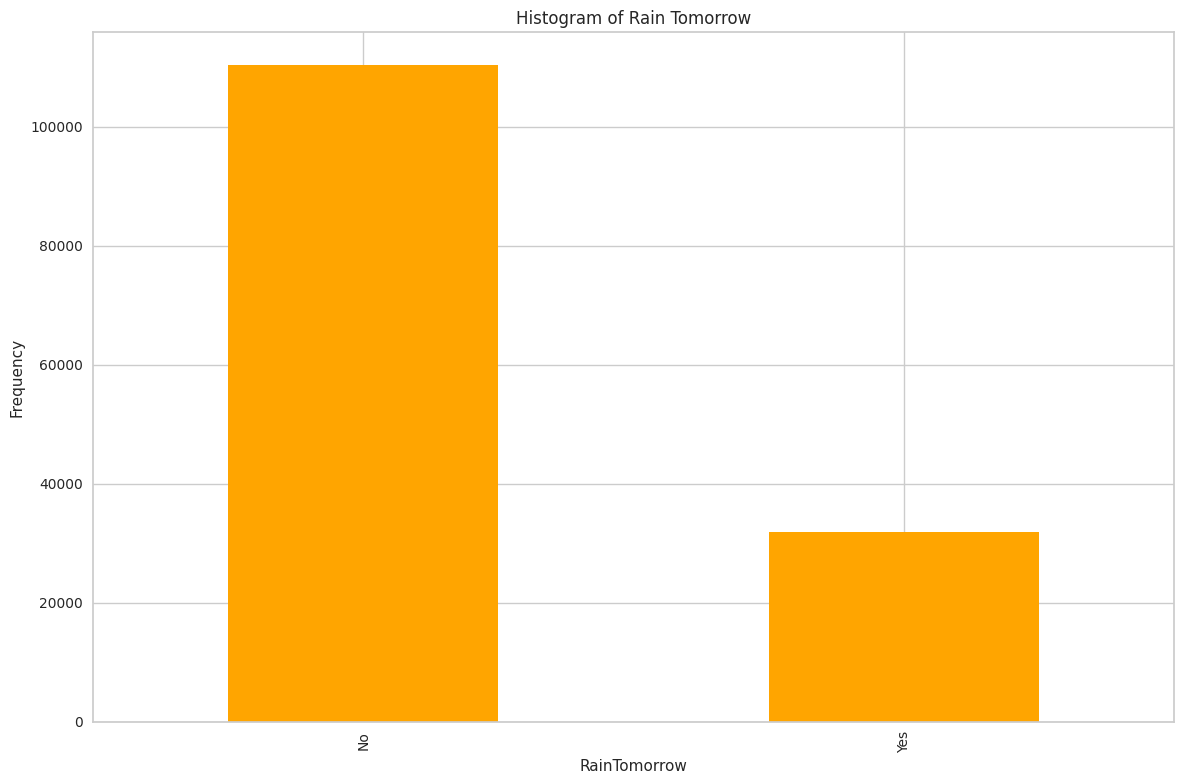

In [187]:
plt.figure(figsize=(12, 8))

rain_df['RainTomorrow'].value_counts().plot(kind='bar', color='orange')
plt.title('Histogram of Rain Tomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The graph states that there were significantly more days that were not followed by rain than the opposite. The NO category had a much higher frequency than the YES category.

### Frequency of chosen indicators

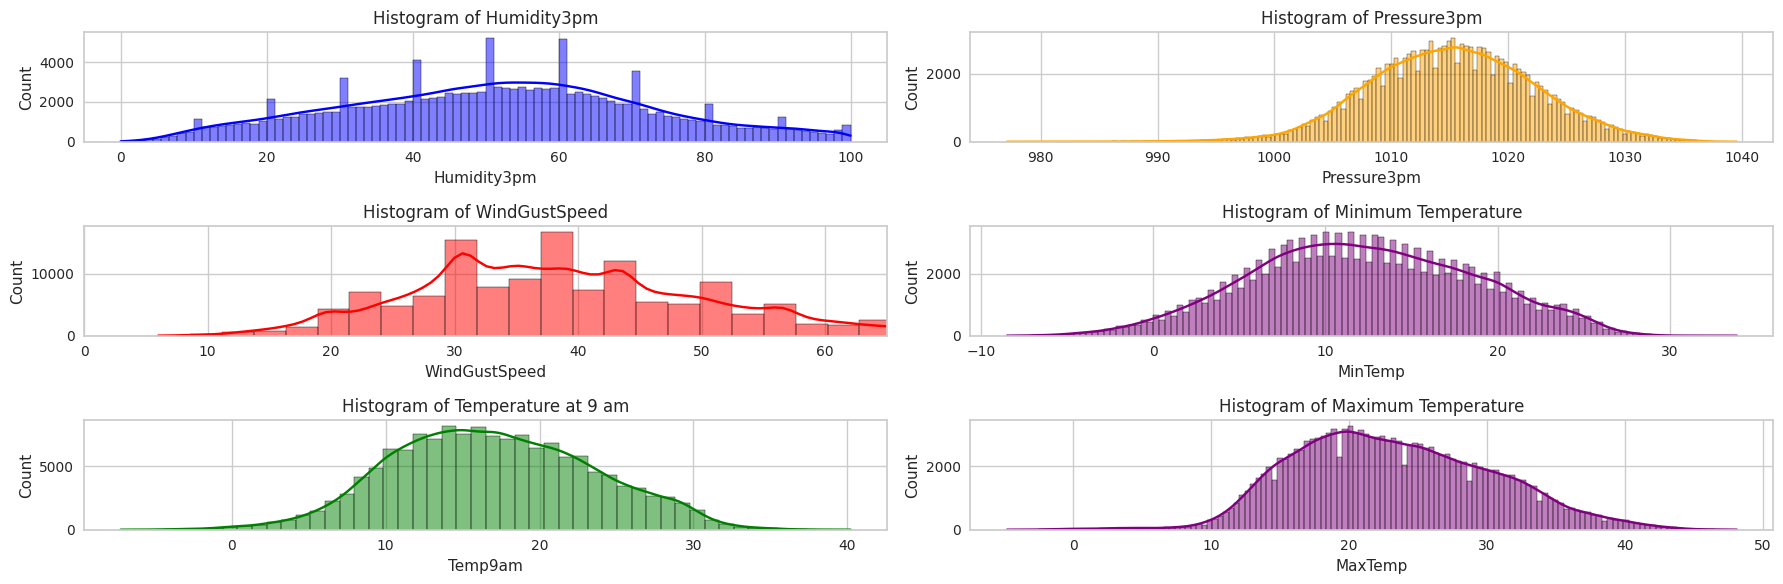

In [188]:
# Plotting histograms for 'Humidity3pm', 'Pressure3pm', and 'WindGustSpeed'
fig, axs = plt.subplots(3, 2, figsize=(18, 6))

sns.histplot(data=rain_df, x='Humidity3pm', kde=True, ax=axs[0,0], color='blue')
axs[0,0].set_title('Histogram of Humidity3pm')

sns.histplot(data=rain_df, x='Pressure3pm', kde=True, ax=axs[0,1], color='orange')
axs[0,1].set_title('Histogram of Pressure3pm')

sns.histplot(data=rain_df, x='WindGustSpeed', bins=50, kde=True, ax=axs[1,0], color='red')
axs[1,0].set_title('Histogram of WindGustSpeed')
axs[1,0].set_xlim(0, rain_df['WindGustSpeed'].quantile(0.95))  # Limiting to 95th percentile for better visualization

sns.histplot(data=rain_df, x='MinTemp', kde=True, ax=axs[1,1], color='purple')
axs[1,1].set_title('Histogram of Minimum Temperature')

sns.histplot(data=rain_df, x='Temp9am',bins=50, kde=True, ax=axs[2,0], color='green')
axs[2,0].set_title('Histogram of Temperature at 9 am')

sns.histplot(data=rain_df, x='MaxTemp', kde=True, ax=axs[2,1], color='purple')
axs[2,1].set_title('Histogram of Maximum Temperature')


plt.tight_layout()
plt.show()

Humidity3pm: The distribution of humidity at 3 pm shows a wide range, with a slight skew towards higher humidity levels. This suggests that there are more instances of higher humidity in the dataset, which could be relevant to the occurrence of rain.

Pressure3pm: Atmospheric pressure at 3 pm appears to have a somewhat normal distribution with a central peak, indicating that most days have pressure values around this central range. Variations from this range might be indicative of weather changes, including the potential for rain.

WindGustSpeed: The distribution of wind gust speed is right-skewed, indicating that lower wind speeds are more common, but there are days with significantly higher wind speeds. This might correlate with weather systems that bring rain.

Temp9am: The distribution of temperature at 9 am has a slight skew to the left, where the the most values are between 10 to 20 degrees celsius.

The MaxTemp and MinTemp show some differences between each other. The histogram of minimum temperature shows a distribution with a slight left skew, indicating colder days are less common, while the maximum temperature has a slight right skew, suggesting hotter days are less frequent, with both distributions being roughly bell-shaped and centered around their respective middle ranges.

We can also look at the top 10 locations with the highest number of observations to see if it has rained there similarly.

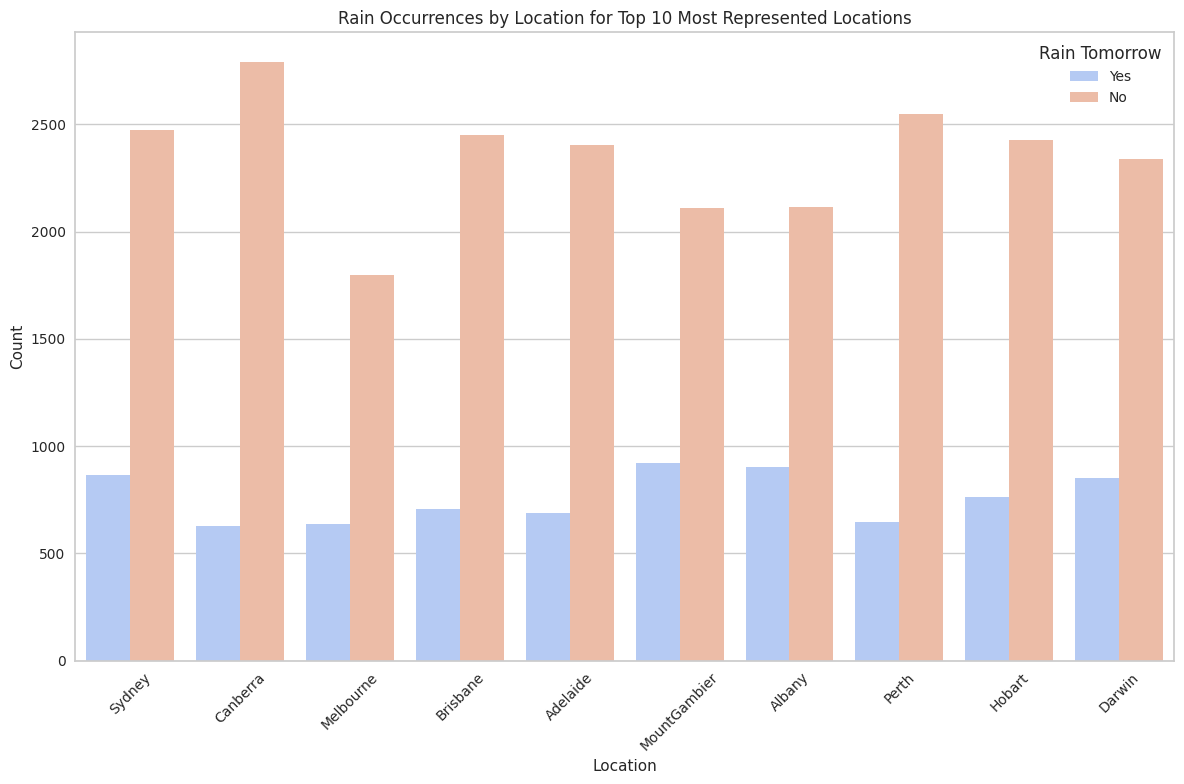

In [189]:
# Find the top 10 locations with the highest number of observations
top_locations = rain_df['Location'].value_counts().head(10).index

# Filter the dataset for these top locations
data_top_locations = rain_df[rain_df['Location'].isin(top_locations)]

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=data_top_locations, x='Location', hue='RainTomorrow', palette='coolwarm')
plt.title('Rain Occurrences by Location for Top 10 Most Represented Locations')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Rain Tomorrow', loc='upper right')
plt.tight_layout()
plt.show()


This visualization allows us to see how the frequency of rain occurrences varies across different geographical locations.

## Relations between predictors and target variable

We will create scatter plots hoping they will show us the relation between selected predictors and the target variable.

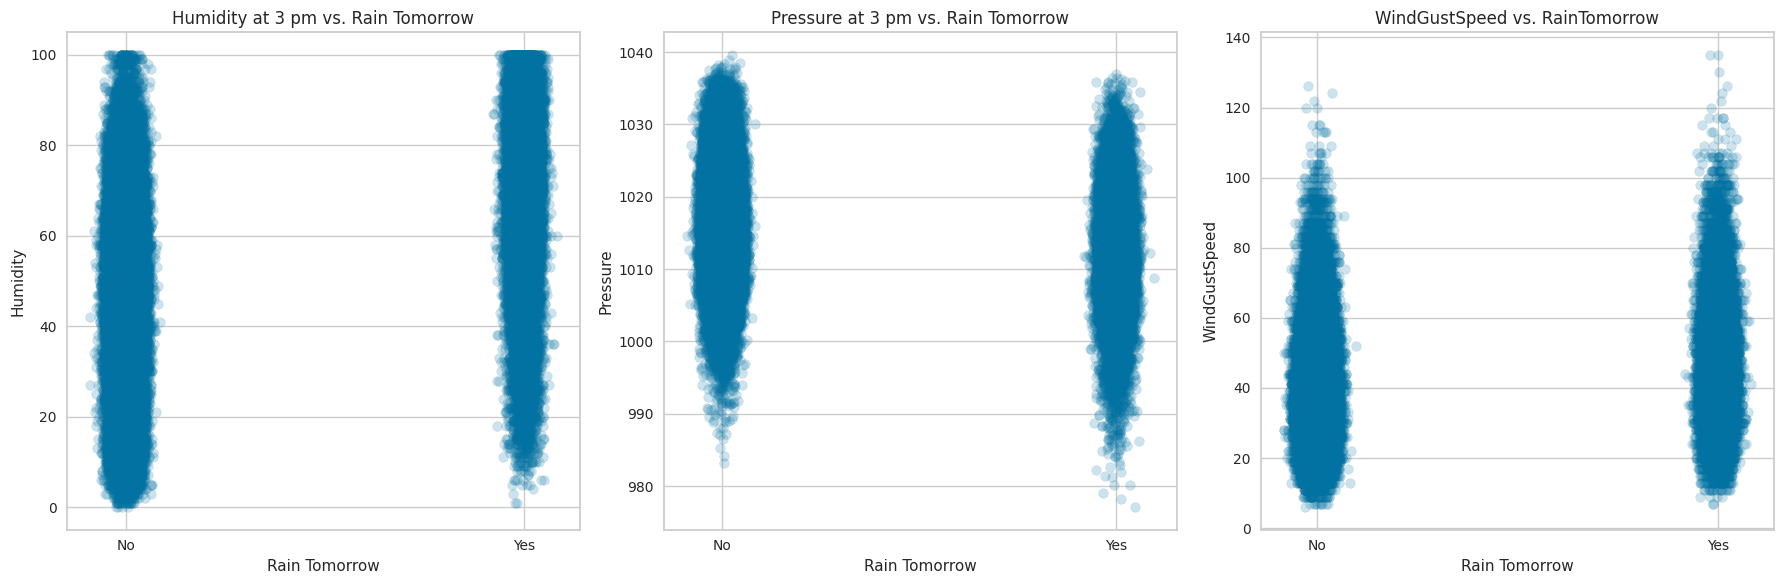

In [190]:
def jitter_plot(x, y, jitter_amount=0.02):
    plt.xticks([0, 1], ['No', 'Yes'])
    x_jittered = x + np.random.normal(0, jitter_amount, size=len(x))
    plt.scatter(x_jittered, y, alpha=0.2)


data_clean = rain_df.dropna(subset=['MaxTemp', 'Humidity3pm', 'Pressure3pm', 'RainTomorrow'])
data_clean['RainTomorrow'] = rain_df['RainTomorrow'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(18, 6))



# Humidity3pm vs. RainTomorrow
plt.subplot(1, 3, 1)
jitter_plot(data_clean['RainTomorrow'], data_clean['Humidity3pm'])
plt.title('Humidity at 3 pm vs. Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Humidity')

# Pressure3pm vs. RainTomorrow
plt.subplot(1, 3, 2)
jitter_plot(data_clean['RainTomorrow'], data_clean['Pressure3pm'])
plt.title('Pressure at 3 pm vs. Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Pressure')

plt.subplot(1, 3, 3)
jitter_plot(data_clean['RainTomorrow'], data_clean['WindGustSpeed'])
plt.title('WindGustSpeed vs. RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('WindGustSpeed')
plt.tight_layout()
plt.show()


The scatter plots show us that there are some differences between the values of predictors depending on the target attribute, although they are not very easy to read, therefore we will use boxplots instead to examine the relationships.

Other weather actors commonly associated with precipitation are humidity, pressure and windspeed:

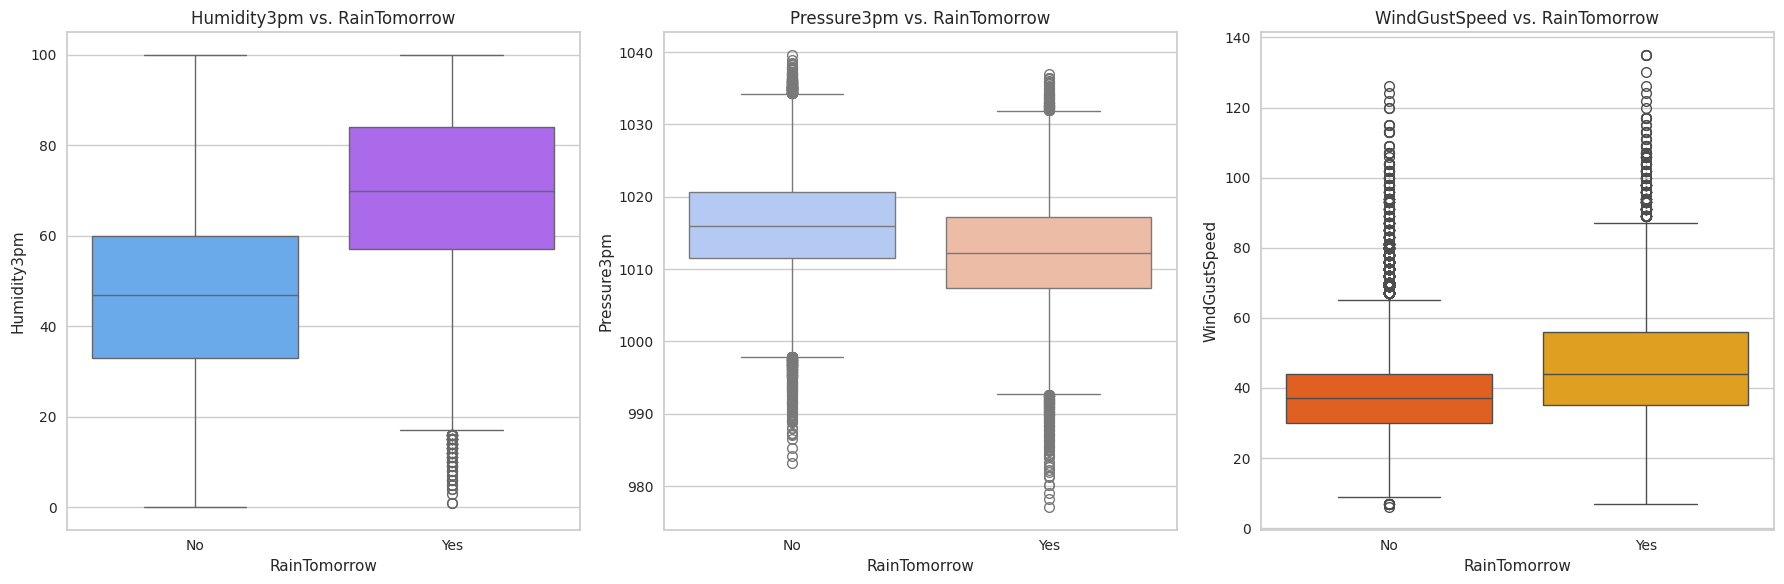

In [191]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=rain_df, ax=axs[0], palette='cool')
axs[0].set_title('Humidity3pm vs. RainTomorrow')

sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=rain_df, ax=axs[1], palette='coolwarm')
axs[1].set_title('Pressure3pm vs. RainTomorrow')

sns.boxplot(x='RainTomorrow', y='WindGustSpeed', data=rain_df, ax=axs[2], palette='autumn')
axs[2].set_title('WindGustSpeed vs. RainTomorrow')

plt.tight_layout()
plt.show()


# 2) Data preprocessing

## 1. Preprocessing for supervised machine learning:

### Derive binary target attribute

The target attribute is RainTomorrow, which indicates whether it will rain the next day with "Yes" or "No". We will consider "Yes" as the positive value (1) and "No" as the negative value (0).

In [192]:
rain_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [193]:
rain_df['RainTomorrow'] = rain_df['RainTomorrow'].map({'Yes':1, 'No': 0})
rain_df['RainToday'] = rain_df['RainToday'].map({'Yes':1, 'No': 0})
rain_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8        0.0           0.0  
1          24.3        0.0           0.0  
2          23.2        0.0           0.0  
3          26.5        0.0           0.0  
4          29.7        0.0           0.0  
...         ...        ...           ...  
145455     22.4        0.0           0.0  
145456     24.5        0.0           0.0  
145457     26.1        0.0           0.0  
145458     26.0        0.0           0.0  
145459     20.9        0.0           NaN  

[145460 rows x 23 columns]

### Extracting time feature

In [194]:
rain_df['Year'] = pd.to_datetime(rain_df['Date']).dt.year
rain_df['Month'] = pd.to_datetime(rain_df['Date']).dt.month
rain_df['Day'] = pd.to_datetime(rain_df['Date']).dt.day

rain_df = rain_df.drop('Date', axis=1)


In [195]:
rain_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
0                W           44.0          W        WNW  ...       1007.1   
1              WNW           44.0        NNW        WSW  ...       1007.8   
2              WSW           46.0          W        WSW  ...       1008.7   
3               NE           24.0         SE          E  ...       1012.8   
4                W           41.0        ENE         NW  ...       1006.0   
...            ...            ...        ...        ...  ...          ...   
145455           E           31.0         SE        ENE  ...       1020.3   
145456         NNW           22.0         SE          N  ...       1019.1   
145457           N           37.0         SE        WNW  ...       1016.8   
145458          SE           28.0        SSE          N  ...       1016.5   
145459         NaN            NaN        ESE        ESE  ...       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0            8.0       NaN     16.9     21.8        0.0           0.0  2008   
1            NaN       NaN     17.2     24.3        0.0           0.0  2008   
2            NaN       2.0     21.0     23.2        0.0           0.0  2008   
3            NaN       NaN     18.1     26.5        0.0           0.0  2008   
4            7.0       8.0     17.8     29.7        0.0           0.0  2008   
...          ...       ...      ...      ...        ...           ...   ...   
145455       NaN       NaN     10.1     22.4        0.0           0.0  2017   
145456       NaN       NaN     10.9     24.5        0.0           0.0  2017   
145457       NaN       NaN     12.5     26.1        0.0           0.0  2017   
145458       3.0       2.0     15.1     26.0        0.0           0.0  2017   
145459       8.0       8.0     15.0     20.9        0.0           NaN  2017   

        Month  Day  
0          12    1  
1          12    2  
2          12    3  
3          12    4  
4          12    5  
...       ...  ...  
145455      6   21  
145456      6   22  
145457      6   23  
145458      6   24  
145459      6   25  

[145460 rows x 25 columns]

### Split the data into a training set and a test set

It is up to you what percentage will be used for training but the training set needs to be larger than the test set.

We will create a 70-30 split between training and test data.

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_classification = rain_df.drop('RainTomorrow', axis=1)
y_classification = rain_df['RainTomorrow']

In [198]:
train_set_classification, test_set_classification = train_test_split(rain_df, test_size=0.3, random_state=42)
len(train_set_classification), len(test_set_classification)

(101822, 43638)

### Handle missing values

We will now check the missing values in our dataset: 

- Given that it's important not to leak information from the test set into the training process, let's proceed with handling missing values in the training set first.

In [199]:
for column in train_set_classification.columns:
    print(f"The column {column} has {rain_df[column].isna().sum()} NaN values.")

The column Location has 0 NaN values.
The column MinTemp has 1485 NaN values.
The column MaxTemp has 1261 NaN values.
The column Rainfall has 3261 NaN values.
The column Evaporation has 62790 NaN values.
The column Sunshine has 69835 NaN values.
The column WindGustDir has 10326 NaN values.
The column WindGustSpeed has 10263 NaN values.
The column WindDir9am has 10566 NaN values.
The column WindDir3pm has 4228 NaN values.
The column WindSpeed9am has 1767 NaN values.
The column WindSpeed3pm has 3062 NaN values.
The column Humidity9am has 2654 NaN values.
The column Humidity3pm has 4507 NaN values.
The column Pressure9am has 15065 NaN values.
The column Pressure3pm has 15028 NaN values.
The column Cloud9am has 55888 NaN values.
The column Cloud3pm has 59358 NaN values.
The column Temp9am has 1767 NaN values.
The column Temp3pm has 3609 NaN values.
The column RainToday has 3261 NaN values.
The column RainTomorrow has 3267 NaN values.
The column Year has 0 NaN values.
The column Month has 0

We can display the missing percentage for each column

In [200]:
missing_values = train_set_classification.isnull().sum()
missing_percentage = (missing_values / len(train_set_classification)) * 100
missing_info = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_info

Sunshine         48.044627
Evaporation      43.168470
Cloud3pm         40.804541
Cloud9am         38.432755
Pressure9am      10.361219
Pressure3pm      10.347469
WindDir9am        7.263656
WindGustDir       7.057414
WindGustSpeed     7.017148
Humidity3pm       3.122115
WindDir3pm        2.910962
Temp3pm           2.493567
Rainfall          2.241166
RainToday         2.241166
RainTomorrow      2.228399
WindSpeed3pm      2.099743
Humidity9am       1.842431
Temp9am           1.217811
WindSpeed9am      1.214865
MinTemp           1.006659
MaxTemp           0.847558
dtype: float64

We will drop the columns which have more than 20% of missing data as they won't provide reliable information due to the amount of missing data:

In [201]:
train_set_classification = train_set_classification.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'])
test_set_classification = test_set_classification.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'])

For columns with less than 20% of missing data we will do data imputation for:

- numerical columns:

In [202]:
rain_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
0                W           44.0          W        WNW  ...       1007.1   
1              WNW           44.0        NNW        WSW  ...       1007.8   
2              WSW           46.0          W        WSW  ...       1008.7   
3               NE           24.0         SE          E  ...       1012.8   
4                W           41.0        ENE         NW  ...       1006.0   
...            ...            ...        ...        ...  ...          ...   
145455           E           31.0         SE        ENE  ...       1020.3   
145456         NNW           22.0         SE          N  ...       1019.1   
145457           N           37.0         SE        WNW  ...       1016.8   
145458          SE           28.0        SSE          N  ...       1016.5   
145459         NaN            NaN        ESE        ESE  ...       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0            8.0       NaN     16.9     21.8        0.0           0.0  2008   
1            NaN       NaN     17.2     24.3        0.0           0.0  2008   
2            NaN       2.0     21.0     23.2        0.0           0.0  2008   
3            NaN       NaN     18.1     26.5        0.0           0.0  2008   
4            7.0       8.0     17.8     29.7        0.0           0.0  2008   
...          ...       ...      ...      ...        ...           ...   ...   
145455       NaN       NaN     10.1     22.4        0.0           0.0  2017   
145456       NaN       NaN     10.9     24.5        0.0           0.0  2017   
145457       NaN       NaN     12.5     26.1        0.0           0.0  2017   
145458       3.0       2.0     15.1     26.0        0.0           0.0  2017   
145459       8.0       8.0     15.0     20.9        0.0           NaN  2017   

        Month  Day  
0          12    1  
1          12    2  
2          12    3  
3          12    4  
4          12    5  
...       ...  ...  
145455      6   21  
145456      6   22  
145457      6   23  
145458      6   24  
145459      6   25  

[145460 rows x 25 columns]

In [203]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')

num_columns = ['Pressure9am','Pressure3pm','WindGustSpeed','Humidity3pm','Temp3pm','Temp9am','Rainfall',
'WindSpeed3pm','WindSpeed9am','Humidity9am','MinTemp','MaxTemp']

for column in num_columns:
    train_set_classification[[column]] = num_imputer.fit_transform(train_set_classification[[column]])
    test_set_classification[[column]] = num_imputer.fit_transform(test_set_classification[[column]])

In [204]:
train_set_classification[num_columns].head(20)

Pressure9am  Pressure3pm  WindGustSpeed  Humidity3pm  Temp3pm  \
141565       1013.3       1009.4           48.0         27.0     33.4   
85325        1013.3       1011.4           20.0         50.0     29.4   
17847        1017.6       1015.2           39.0         52.0     21.1   
69746        1017.6       1015.2           28.0         52.0     21.1   
98356        1016.1       1017.1           35.0         60.0     19.3   
45159        1030.5       1029.6           35.0         69.0     19.6   
72892        1002.7        997.9           52.0         33.0     32.2   
121085       1009.7       1011.7           72.0         72.0     13.5   
9427         1018.8       1016.9           31.0         70.0     25.8   
31676        1024.5       1025.9           65.0         40.0     18.0   
71378        1019.2       1015.6           33.0         23.0     24.6   
55399        1011.3       1009.0           39.0         61.0     14.8   
116401       1009.6       1006.2           44.0         32.0     33.3   
9928         1017.6       1014.8           26.0         48.0     17.4   
52249        1017.6       1015.2           43.0         52.0     21.1   
31067        1022.2       1019.8           39.0         76.0     17.3   
72198        1018.2       1016.3           35.0         14.0     37.4   
134230       1027.6       1024.3           33.0         64.0     18.8   
102259       1029.3       1027.1           35.0         79.0     14.6   
12222        1018.3       1014.8           30.0         39.0     19.1   

        Temp9am  Rainfall  WindSpeed3pm  WindSpeed9am  Humidity9am  MinTemp  \
141565     25.7       0.0          19.0          19.0         66.0     22.2   
85325      24.7       0.0           7.0           7.0         50.0     16.9   
17847      17.0       2.4          19.0          28.0         39.0      8.8   
69746      16.7       0.0          19.0          11.0         70.0     12.0   
98356      18.2       1.2          17.0          13.0         75.0     11.8   
45159      18.1       9.6          11.0          19.0         81.0     15.0   
72892      23.6       0.0          24.0          19.0         44.0     18.6   
121085     15.0       2.6          24.0          15.0         71.0     12.7   
9427       23.3       0.0          20.0          11.0         66.0     15.9   
31676      15.5       0.0          33.0          31.0         45.0     10.1   
71378      14.7       0.0           9.0          11.0         57.0      8.4   
55399      10.0       0.8          31.0          30.0         96.0      6.4   
116401     26.1       0.0          28.0          11.0         48.0     20.0   
9928       12.6       0.0          11.0           4.0         74.0      4.3   
52249      16.7       0.0          19.0          13.0         70.0     12.0   
31067      16.7       0.2           7.0          13.0         61.0      9.9   
72198      24.8       0.0          17.0          13.0         39.0     19.0   
134230     11.9       0.0          20.0           4.0         85.0      5.0   
102259     12.7       0.8          13.0          20.0         89.0     10.4   
12222      12.5       0.2          15.0          11.0         70.0      8.5   

        MaxTemp  
141565     34.2  
85325      31.4  
17847      20.9  
69746      22.6  
98356      21.3  
45159      20.4  
72892      35.6  
121085     17.8  
9427       26.7  
31676      19.1  
71378      26.4  
55399      15.6  
116401     35.1  
9928       18.1  
52249       3.2  
31067      19.0  
72198      38.2  
134230     19.8  
102259     15.9  
12222      19.5

In [205]:
missing_values = train_set_classification.isnull().sum()
missing_percentage = (missing_values / len(train_set_classification)) * 100
missing_info = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_info

WindDir9am      7.263656
WindGustDir     7.057414
WindDir3pm      2.910962
RainToday       2.241166
RainTomorrow    2.228399
dtype: float64

- categorical columns:

We will not impute missing values in the target variable column as this would introduce significant bias into our models.

In [206]:
cat_imputer = SimpleImputer(strategy='most_frequent')

cat_columns = ['WindDir9am','WindGustDir','WindDir3pm','RainToday']

for column in cat_columns:
    train_set_classification[[column]] = cat_imputer.fit_transform(train_set_classification[[column]])
    test_set_classification[[column]] = cat_imputer.fit_transform(test_set_classification[[column]])

In [207]:
missing_values = train_set_classification.isnull().sum()
missing_percentage = (missing_values / len(train_set_classification)) * 100
missing_info = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_info

RainTomorrow    2.228399
dtype: float64

We will remove those rows where the target variable value is missing:

In [208]:
print("Number of rows before removing missing target values:", len(train_set_classification))

train_set_classification = train_set_classification.dropna(subset=['RainTomorrow'])
test_set_classification = test_set_classification.dropna(subset=['RainTomorrow'])

print("Number of rows after removing missing target values:", len(train_set_classification))

Number of rows before removing missing target values: 101822
Number of rows after removing missing target values: 99553


We have successfully handled all the missing data in our dataset.

### Handle imbalance

We will now check the class imbalance in our dataset:

In [209]:
# Check the class distribution
class_distribution = train_set_classification['RainTomorrow'].value_counts()
print(class_distribution)

RainTomorrow
0.0    77327
1.0    22226
Name: count, dtype: int64


There is a class imbalance in our dataset, we will upsample our minority class to match the count of the majority class:

In [210]:
from sklearn.utils import resample

df_majority = train_set_classification[train_set_classification.RainTomorrow==0]
df_minority = train_set_classification[train_set_classification.RainTomorrow==1]

df_minority_upsampled = resample(df_minority, replace=True,n_samples=len(df_majority), random_state=123)  

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.RainTomorrow.value_counts())


RainTomorrow
0.0    77327
1.0    77327
Name: count, dtype: int64


In [211]:
train_set_classification = df_upsampled

We have successfully performed resampling the training set, it was important to keep the test data as a realistic representation of the original dataset, therefore we have not resampled the test set.

### One-hot encoding

We will now perform one-hot encoding of the categorical variable columns of wind direction with pandas:

In [212]:
train_set_classification.WindDir3pm.unique()

array(['E', 'ENE', 'SE', 'SSE', 'NNE', 'SSW', 'SW', 'NW', 'NNW', 'WNW',
       'NE', 'ESE', 'S', 'WSW', 'N', 'W'], dtype=object)

Each wind direction column contains a large number of unique values, encoding 16 values for each of our three categorical columns would introduce 48 new columns which could lead to the curse of dimensionality and possible long training times. 

We will try to do a sine and cosine transformation of the wind directions into degrees which will significantly reduce the number of new columns effectively only to one while still maintaining all the data.

In [213]:
directions_to_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

def convert_wind_direction(df, column):
    degrees = df[column].map(directions_to_degrees)
    df[column+'_sin'] = np.sin(np.radians(degrees))
    df[column+'_cos'] = np.cos(np.radians(degrees))
    return df

for col in ['WindDir9am', 'WindGustDir', 'WindDir3pm']:
    train_set_classification = convert_wind_direction(train_set_classification, col)
    test_set_classification = convert_wind_direction(test_set_classification, col)

train_set_classification = train_set_classification.drop(['WindDir9am', 'WindGustDir', 'WindDir3pm'], axis=1)
test_set_classification = test_set_classification.drop(['WindDir9am', 'WindGustDir', 'WindDir3pm'], axis=1)


In [214]:
print(train_set_classification.columns)
train_set_classification

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Year', 'Month', 'Day', 'WindDir9am_sin',
       'WindDir9am_cos', 'WindGustDir_sin', 'WindGustDir_cos',
       'WindDir3pm_sin', 'WindDir3pm_cos'],
      dtype='object')


Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  \
141565         Darwin     22.2     34.2       0.0           48.0   
85325        Brisbane     16.9     31.4       0.0           20.0   
17847       Newcastle      8.8     20.9       2.4           39.0   
98356        Adelaide     11.8     21.3       1.2           35.0   
45159      Wollongong     15.0     20.4       9.6           35.0   
...               ...      ...      ...       ...            ...   
35906   SydneyAirport     16.7     29.7       2.2           59.0   
87299          Cairns     24.6     31.3       0.0           39.0   
117250     PearceRAAF     11.2     21.1       0.0           59.0   
85691        Brisbane     14.3     24.4       0.0           30.0   
124024     SalmonGums      6.4     14.5       0.4           44.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
141565          19.0          19.0         66.0         27.0       1013.3   
85325            7.0           7.0         50.0         50.0       1013.3   
17847           28.0          19.0         39.0         52.0       1017.6   
98356           13.0          17.0         75.0         60.0       1016.1   
45159           19.0          11.0         81.0         69.0       1030.5   
...              ...           ...          ...          ...          ...   
35906           13.0          24.0         48.0         63.0       1016.6   
87299            6.0          13.0         88.0         73.0       1010.4   
117250          19.0          19.0         55.0         53.0       1019.3   
85691            2.0          11.0         71.0         58.0       1028.8   
124024          19.0          22.0         81.0         55.0       1017.6   

        ...  RainTomorrow  Year  Month  Day  WindDir9am_sin  WindDir9am_cos  \
141565  ...           0.0  2015      6   18        0.707107   -7.071068e-01   
85325   ...           0.0  2012      3   10       -0.923880   -3.826834e-01   
17847   ...           0.0  2016      9   30        0.000000    1.000000e+00   
98356   ...           0.0  2014      4   26       -0.382683   -9.238795e-01   
45159   ...           0.0  2016      4   24       -0.382683   -9.238795e-01   
...     ...           ...   ...    ...  ...             ...             ...   
35906   ...           1.0  2015     10   12       -0.707107    7.071068e-01   
87299   ...           1.0  2009      3   10       -1.000000   -1.836970e-16   
117250  ...           1.0  2016      6   12        0.000000    1.000000e+00   
85691   ...           1.0  2013      5    9       -0.382683   -9.238795e-01   
124024  ...           1.0  2009      7   13       -1.000000   -1.836970e-16   

        WindGustDir_sin  WindGustDir_cos  WindDir3pm_sin  WindDir3pm_cos  
141565     1.000000e+00     6.123234e-17        1.000000    6.123234e-17  
85325      1.000000e+00     6.123234e-17        0.923880    3.826834e-01  
17847     -1.000000e+00    -1.836970e-16        0.707107   -7.071068e-01  
98356      1.224647e-16    -1.000000e+00        0.382683   -9.238795e-01  
45159     -3.826834e-01    -9.238795e-01        0.382683   -9.238795e-01  
...                 ...              ...             ...             ...  
35906      1.224647e-16    -1.000000e+00        0.923880    3.826834e-01  
87299     -1.000000e+00    -1.836970e-16        1.000000    6.123234e-17  
117250    -1.000000e+00    -1.836970e-16        0.000000    1.000000e+00  
85691      7.071068e-01    -7.071068e-01        0.382683   -9.238795e-01  
124024    -9.238795e-01    -3.826834e-01       -0.707107   -7.071068e-01  

[154654 rows x 24 columns]

<Axes: >

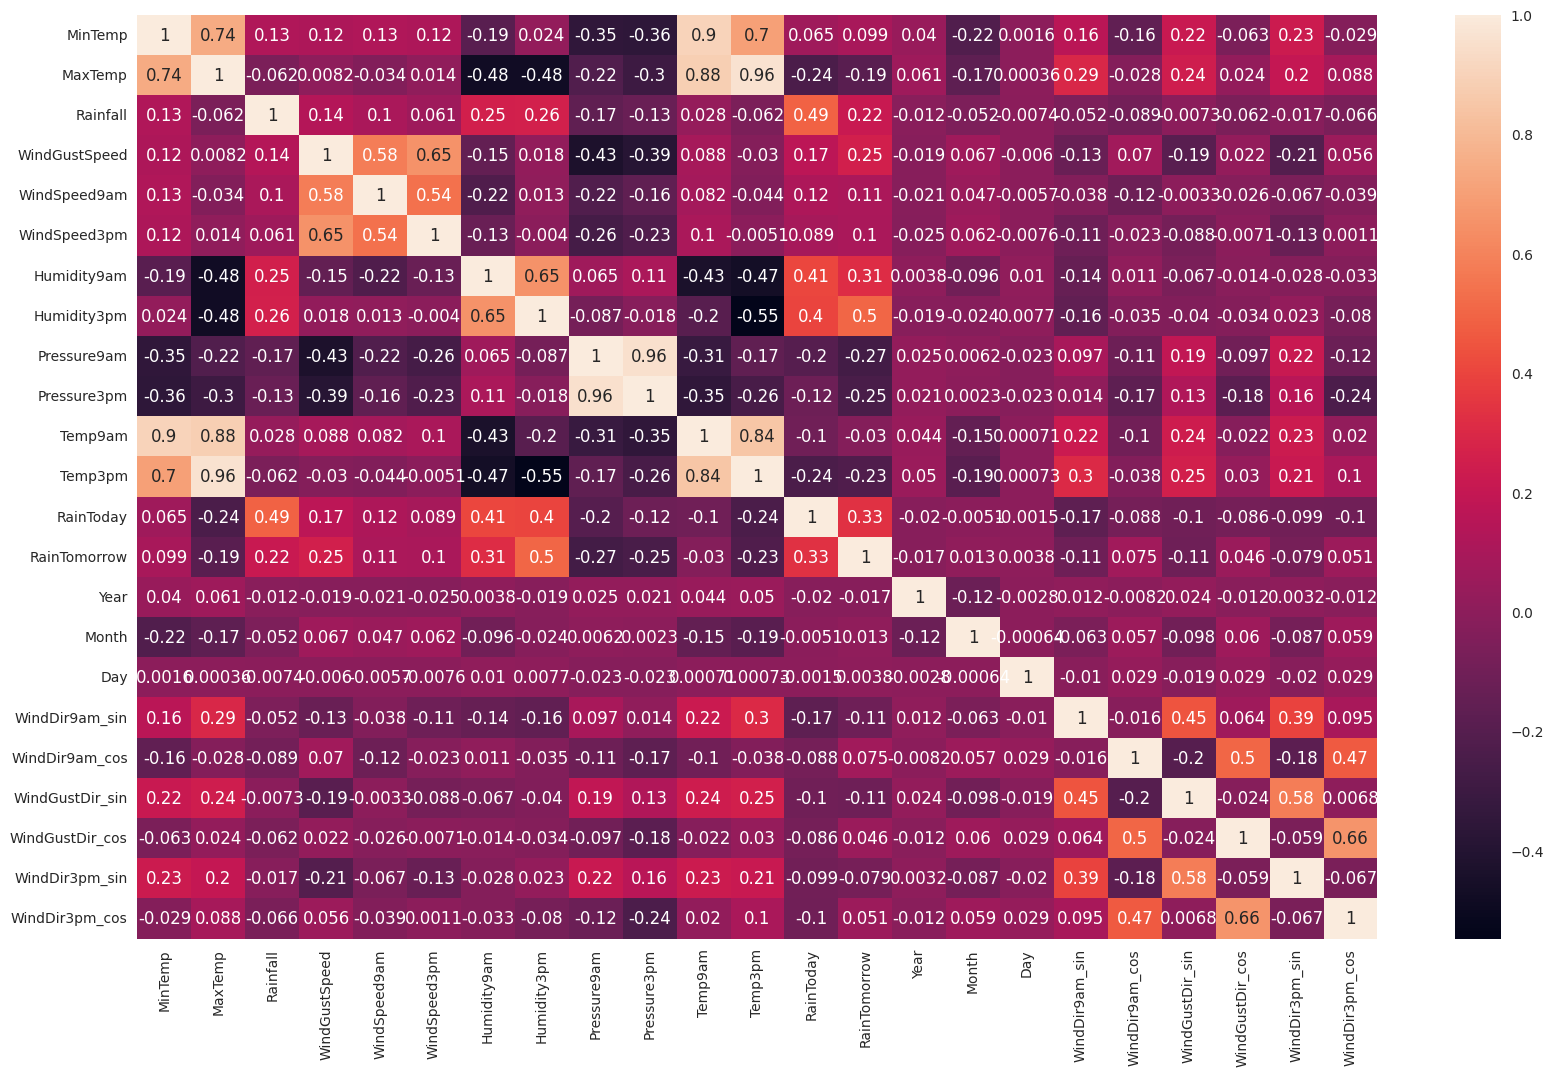

In [215]:
cor = train_set_classification.drop(columns=['Location']).corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot=True)

We also need to do encode Location column into numbers:

In [216]:
train_set_classification.Location.unique()

array(['Darwin', 'Brisbane', 'Newcastle', 'Adelaide', 'Wollongong',
       'Mildura', 'CoffsHarbour', 'Sydney', 'PearceRAAF', 'Launceston',
       'MountGambier', 'Moree', 'Townsville', 'Witchcliffe', 'Perth',
       'Penrith', 'Canberra', 'Walpole', 'Uluru', 'NorfolkIsland',
       'AliceSprings', 'Richmond', 'Portland', 'Cairns', 'GoldCoast',
       'SydneyAirport', 'MountGinini', 'BadgerysCreek', 'Melbourne',
       'Williamtown', 'Hobart', 'Nuriootpa', 'Sale', 'WaggaWagga',
       'Bendigo', 'SalmonGums', 'MelbourneAirport', 'NorahHead',
       'Ballarat', 'Watsonia', 'Albany', 'Albury', 'Cobar', 'Woomera',
       'Dartmoor', 'PerthAirport', 'Tuggeranong', 'Nhil', 'Katherine'],
      dtype=object)

In [217]:
la = LabelEncoder()
train_set_classification.Location = la.fit_transform(train_set_classification.Location)
test_set_classification.Location = la.fit_transform(test_set_classification.Location)

In [218]:
train_set_classification['Location']

141565    13
85325      7
17847     24
98356      0
45159     47
          ..
35906     38
87299      8
117250    29
85691      7
124024    36
Name: Location, Length: 154654, dtype: int64

In [219]:
train_set_classification.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Year', 'Month', 'Day', 'WindDir9am_sin',
       'WindDir9am_cos', 'WindGustDir_sin', 'WindGustDir_cos',
       'WindDir3pm_sin', 'WindDir3pm_cos'],
      dtype='object')

### Feature selection

<Axes: >

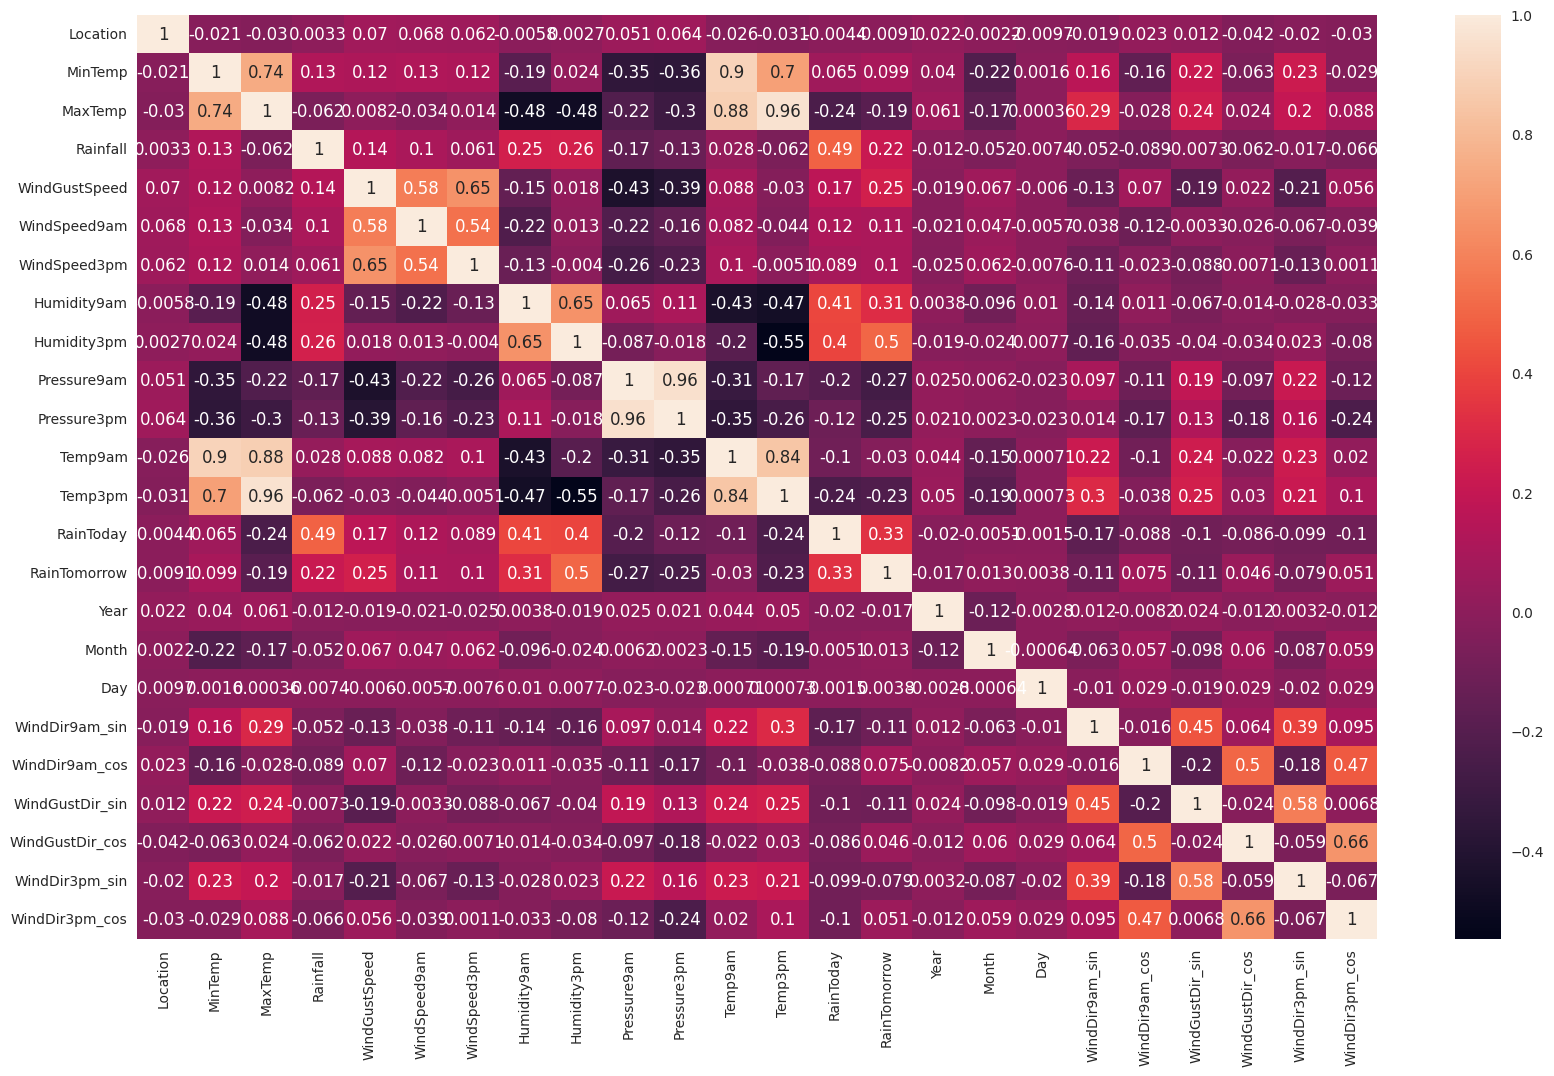

In [220]:
cor = train_set_classification.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot=True)


The location data column shows low correlation.

The columns Location, Year, Month and Day are uncorrelated with the target atribute therefore we will drop these.

In [221]:
train_set_classification = train_set_classification.drop(columns=['Location','Day', 'Month', 'Year'])

In [222]:
test_set_classification = test_set_classification.drop(columns=['Location', 'Day', 'Month', 'Year'])

## 2. Preprocessing for unsupervised models (clustering)

In [223]:
data_set_clustering = pd.concat([train_set_classification, test_set_classification], ignore_index=True)
data_set_clustering

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          22.2     34.2       0.0           48.0          19.0          19.0   
1          16.9     31.4       0.0           20.0           7.0           7.0   
2           8.8     20.9       2.4           39.0          28.0          19.0   
3          11.8     21.3       1.2           35.0          13.0          17.0   
4          15.0     20.4       9.6           35.0          19.0          11.0   
...         ...      ...       ...            ...           ...           ...   
197289      8.9     24.2       0.0           52.0          28.0          28.0   
197290     15.8     29.8       0.0           39.0           7.0           4.0   
197291     18.1     21.4       4.4           67.0          13.0          41.0   
197292      4.6     17.4       0.0           46.0          11.0          24.0   
197293     14.2     23.4       0.4           52.0          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              66.0         27.0       1013.3       1009.4     25.7     33.4   
1              50.0         50.0       1013.3       1011.4     24.7     29.4   
2              39.0         52.0       1017.6       1015.2     17.0     21.1   
3              75.0         60.0       1016.1       1017.1     18.2     19.3   
4              81.0         69.0       1030.5       1029.6     18.1     19.6   
...             ...          ...          ...          ...      ...      ...   
197289         59.0         29.0       1016.0       1008.5     12.0     23.3   
197290         81.0         40.0       1021.4       1018.2     18.4     29.0   
197291         77.0         80.0       1022.0       1021.2     18.2     20.6   
197292         59.0         32.0       1022.0       1019.9     11.3     16.3   
197293         75.0         68.0       1005.0       1000.9     17.9     21.9   

        RainToday  RainTomorrow  WindDir9am_sin  WindDir9am_cos  \
0             0.0           0.0        0.707107       -0.707107   
1             0.0           0.0       -0.923880       -0.382683   
2             1.0           0.0        0.000000        1.000000   
3             1.0           0.0       -0.382683       -0.923880   
4             1.0           0.0       -0.382683       -0.923880   
...           ...           ...             ...             ...   
197289        0.0           1.0        0.000000        1.000000   
197290        0.0           1.0        0.000000        1.000000   
197291        1.0           1.0       -0.707107       -0.707107   
197292        0.0           0.0       -0.382683       -0.923880   
197293        0.0           0.0        0.923880        0.382683   

        WindGustDir_sin  WindGustDir_cos  WindDir3pm_sin  WindDir3pm_cos  
0          1.000000e+00     6.123234e-17        1.000000    6.123234e-17  
1          1.000000e+00     6.123234e-17        0.923880    3.826834e-01  
2         -1.000000e+00    -1.836970e-16        0.707107   -7.071068e-01  
3          1.224647e-16    -1.000000e+00        0.382683   -9.238795e-01  
4         -3.826834e-01    -9.238795e-01        0.382683   -9.238795e-01  
...                 ...              ...             ...             ...  
197289    -3.826834e-01     9.238795e-01        0.000000    1.000000e+00  
197290     9.238795e-01    -3.826834e-01       -0.923880    3.826834e-01  
197291     1.224647e-16    -1.000000e+00       -0.382683   -9.238795e-01  
197292    -7.071068e-01    -7.071068e-01       -0.707107   -7.071068e-01  
197293    -7.071068e-01    -7.071068e-01        0.707107    7.071068e-01  

[197294 rows x 20 columns]

### Rescaling

We will not rescale the data to retain the information gain from the correct scale of the values.

### Feature selection

In [224]:
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))

selector.fit(data_set_clustering)

data_reduced = selector.transform(data_set_clustering)

data_reduced_df = pd.DataFrame(data_reduced, columns=data_set_clustering.columns[selector.get_support()])

data_reduced_df


MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          22.2     34.2       0.0           48.0          19.0          19.0   
1          16.9     31.4       0.0           20.0           7.0           7.0   
2           8.8     20.9       2.4           39.0          28.0          19.0   
3          11.8     21.3       1.2           35.0          13.0          17.0   
4          15.0     20.4       9.6           35.0          19.0          11.0   
...         ...      ...       ...            ...           ...           ...   
197289      8.9     24.2       0.0           52.0          28.0          28.0   
197290     15.8     29.8       0.0           39.0           7.0           4.0   
197291     18.1     21.4       4.4           67.0          13.0          41.0   
197292      4.6     17.4       0.0           46.0          11.0          24.0   
197293     14.2     23.4       0.4           52.0          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              66.0         27.0       1013.3       1009.4     25.7     33.4   
1              50.0         50.0       1013.3       1011.4     24.7     29.4   
2              39.0         52.0       1017.6       1015.2     17.0     21.1   
3              75.0         60.0       1016.1       1017.1     18.2     19.3   
4              81.0         69.0       1030.5       1029.6     18.1     19.6   
...             ...          ...          ...          ...      ...      ...   
197289         59.0         29.0       1016.0       1008.5     12.0     23.3   
197290         81.0         40.0       1021.4       1018.2     18.4     29.0   
197291         77.0         80.0       1022.0       1021.2     18.2     20.6   
197292         59.0         32.0       1022.0       1019.9     11.3     16.3   
197293         75.0         68.0       1005.0       1000.9     17.9     21.9   

        RainToday  RainTomorrow  WindDir9am_sin  WindDir9am_cos  \
0             0.0           0.0        0.707107       -0.707107   
1             0.0           0.0       -0.923880       -0.382683   
2             1.0           0.0        0.000000        1.000000   
3             1.0           0.0       -0.382683       -0.923880   
4             1.0           0.0       -0.382683       -0.923880   
...           ...           ...             ...             ...   
197289        0.0           1.0        0.000000        1.000000   
197290        0.0           1.0        0.000000        1.000000   
197291        1.0           1.0       -0.707107       -0.707107   
197292        0.0           0.0       -0.382683       -0.923880   
197293        0.0           0.0        0.923880        0.382683   

        WindGustDir_sin  WindGustDir_cos  WindDir3pm_sin  WindDir3pm_cos  
0          1.000000e+00     6.123234e-17        1.000000    6.123234e-17  
1          1.000000e+00     6.123234e-17        0.923880    3.826834e-01  
2         -1.000000e+00    -1.836970e-16        0.707107   -7.071068e-01  
3          1.224647e-16    -1.000000e+00        0.382683   -9.238795e-01  
4         -3.826834e-01    -9.238795e-01        0.382683   -9.238795e-01  
...                 ...              ...             ...             ...  
197289    -3.826834e-01     9.238795e-01        0.000000    1.000000e+00  
197290     9.238795e-01    -3.826834e-01       -0.923880    3.826834e-01  
197291     1.224647e-16    -1.000000e+00       -0.382683   -9.238795e-01  
197292    -7.071068e-01    -7.071068e-01       -0.707107   -7.071068e-01  
197293    -7.071068e-01    -7.071068e-01        0.707107    7.071068e-01  

[197294 rows x 20 columns]

We still have too many features for our clustering task, we will eliminate the wind direction columns

In [225]:
data_set_clustering = data_reduced_df
data_set_clustering.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindDir9am_sin', 'WindDir9am_cos', 'WindGustDir_sin',
       'WindGustDir_cos', 'WindDir3pm_sin', 'WindDir3pm_cos'],
      dtype='object')

In [226]:
data_set_clustering = data_set_clustering.drop(columns=['WindDir9am_sin', 'WindDir9am_cos', 'WindGustDir_sin',
       'WindGustDir_cos', 'WindDir3pm_sin', 'WindDir3pm_cos'])

<Axes: >

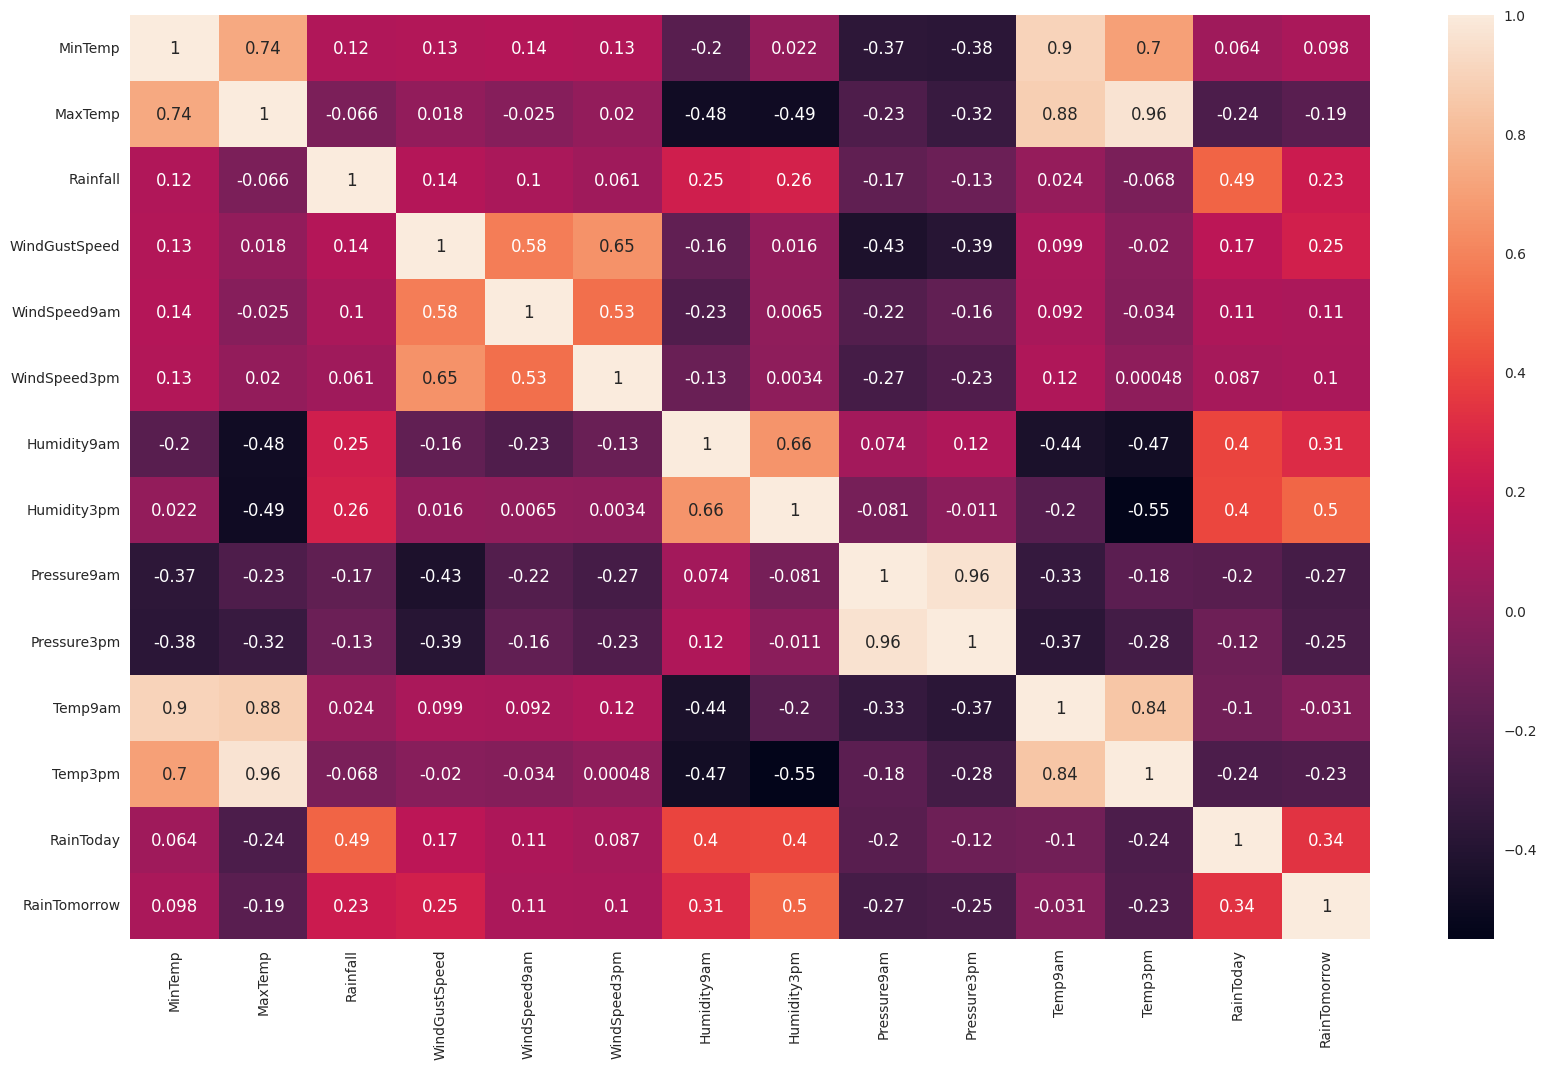

In [227]:
cor = data_set_clustering.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot=True)

In [228]:
data_set_clustering = data_set_clustering.drop(columns=['MinTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am'])

In [229]:
data_set_clustering.columns

Index(['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Outlier detection

We will eliminate outliers using the Interquartile Range Method:

In [230]:
for feature in data_set_clustering.columns:

    Q1 = data_set_clustering[feature].quantile(0.25)
    Q3 = data_set_clustering[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for what is considered an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliersda
    data_set_clustering = data_set_clustering[(data_set_clustering[feature] >= lower_bound) & (data_set_clustering[feature] <= upper_bound)]


In [231]:
data_set_clustering

MaxTemp  Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  \
0          34.2       0.0           48.0         66.0         27.0   
1          31.4       0.0           20.0         50.0         50.0   
6          26.7       0.0           31.0         66.0         70.0   
7          19.1       0.0           65.0         45.0         40.0   
8          26.4       0.0           33.0         57.0         23.0   
...         ...       ...            ...          ...          ...   
197288     20.4       0.0           57.0         44.0         31.0   
197289     24.2       0.0           52.0         59.0         29.0   
197290     29.8       0.0           39.0         81.0         40.0   
197292     17.4       0.0           46.0         59.0         32.0   
197293     23.4       0.4           52.0         75.0         68.0   

        Pressure9am  Pressure3pm  Temp3pm  RainToday  RainTomorrow  
0            1013.3       1009.4     33.4        0.0           0.0  
1            1013.3       1011.4     29.4        0.0           0.0  
6            1018.8       1016.9     25.8        0.0           0.0  
7            1024.5       1025.9     18.0        0.0           0.0  
8            1019.2       1015.6     24.6        0.0           0.0  
...             ...          ...      ...        ...           ...  
197288       1017.6       1015.2     19.3        0.0           0.0  
197289       1016.0       1008.5     23.3        0.0           1.0  
197290       1021.4       1018.2     29.0        0.0           1.0  
197292       1022.0       1019.9     16.3        0.0           0.0  
197293       1005.0       1000.9     21.9        0.0           0.0  

[131225 rows x 10 columns]

### Final preprocessing step

In [232]:
data_for_clustering = data_set_clustering.drop(columns=['RainTomorrow'])

data_for_evaluation = data_set_clustering

We have successfully preprocessed the data for the clustering task, the data is stored under the variables data_for_clustering and data_for_evaluation for further tasks such as modelling.

# 3) Modelling

### Two clustering models with k-means

Taking a random sample from the data_for_clustering dataframe to reduce computational times

In [233]:
sample_size = min(1000, int(data_for_clustering.shape[0] * 0.1))
data_sample = data_for_clustering.sample(n=sample_size, random_state=42)
data_sample_eval = data_for_evaluation.sample(n=sample_size, random_state=42)
true_labels = data_for_evaluation['RainTomorrow'].sample(n=sample_size, random_state=42)

Creating 2 clustering models with KMeans.

In [234]:
k2_model = KMeans(n_clusters=2, random_state=42)
k2_clusters = k2_model.fit_predict(data_sample)

### Choosing the best number of clusters based on WCSS and Silhouette score

WCSS

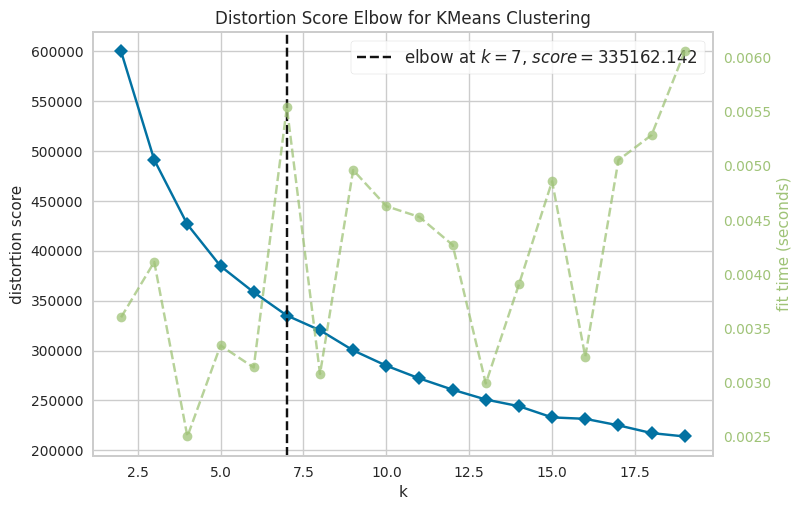

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [235]:
kmeans_tune = KMeans(random_state=42)
#Inertia
visualizer = KElbowVisualizer(kmeans_tune,  k=(2,20), metric="distortion")
visualizer.fit(data_sample)
visualizer.show()

Based on the elbow method the best number of clusters is 7.

Silhouette score

For n_clusters (sample) = 2, the average silhouette_score is : 0.31737178174098346
For n_clusters (sample) = 3, the average silhouette_score is : 0.23423498007008647
For n_clusters (sample) = 4, the average silhouette_score is : 0.21883917166167924
For n_clusters (sample) = 5, the average silhouette_score is : 0.20041049448868128


For n_clusters (sample) = 6, the average silhouette_score is : 0.1759209691426804
For n_clusters (sample) = 7, the average silhouette_score is : 0.18013867316875168
For n_clusters (sample) = 8, the average silhouette_score is : 0.17501173344162083
For n_clusters (sample) = 9, the average silhouette_score is : 0.1763009190397692
For n_clusters (sample) = 10, the average silhouette_score is : 0.17499775317772476


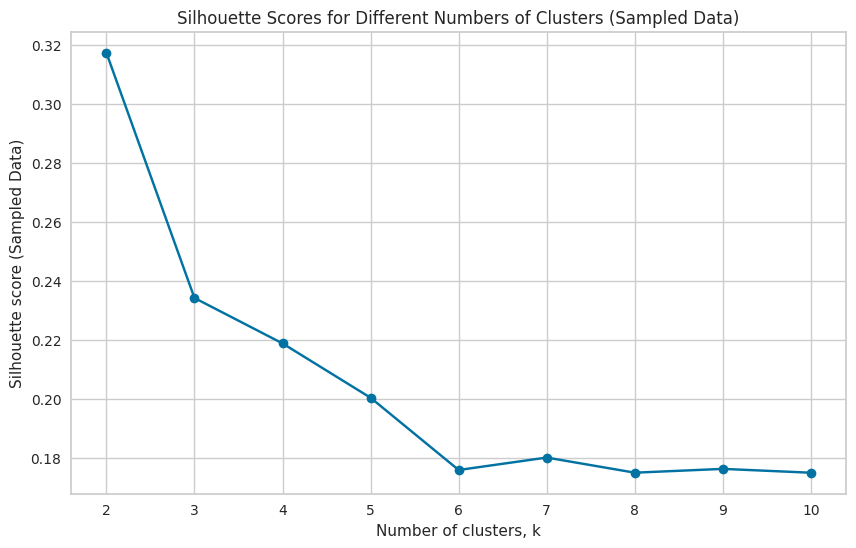

The best number of clusters based on silhouette score (sample) is 2


In [236]:
range_n_clusters = list(range(2, 11))

silhouette_scores_sample = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_sample = clusterer.fit_predict(data_sample)
    silhouette_avg_sample = silhouette_score(data_sample, cluster_labels_sample)
    silhouette_scores_sample.append(silhouette_avg_sample)
    print(f"For n_clusters (sample) = {n_clusters}, the average silhouette_score is : {silhouette_avg_sample}")

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_sample, marker='o', linestyle='-', color='b')
plt.title("Silhouette Scores for Different Numbers of Clusters (Sampled Data)")
plt.xlabel("Number of clusters, k")
plt.ylabel("Silhouette score (Sampled Data)")
plt.show()

best_k_sample = range_n_clusters[silhouette_scores_sample.index(max(silhouette_scores_sample))]
print(f"The best number of clusters based on silhouette score (sample) is {best_k_sample}")

We will create a second k-means model with 7 clusters.

In [237]:
k7_model = KMeans(n_clusters=7, random_state=42)
k7_clusters = k7_model.fit_predict(data_sample)

### Make hierarchical clustering and visualize it.

In [238]:
hierarchical_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarchical_clustering.fit(data_sample)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

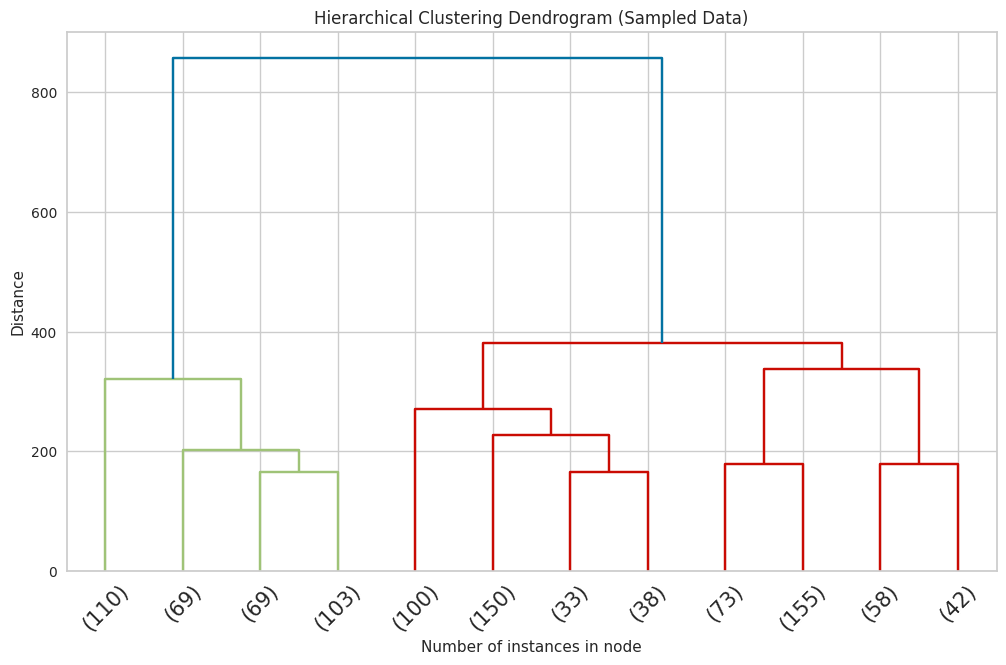

In [239]:
Z_sample = linkage(data_sample, 'ward')

plt.figure(figsize=(12, 7))
dendrogram(Z_sample,truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15.)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Number of instances in node')
plt.ylabel('Distance')
plt.show()

From the hierarchical clustering dendrogram we can see that there are two large clusters, in the red cluster we see that there are two smaller clusters -> three clusters could also be a viable option.

### Experimenting with different clustering setups 

#### Experimenting with different number of clusters

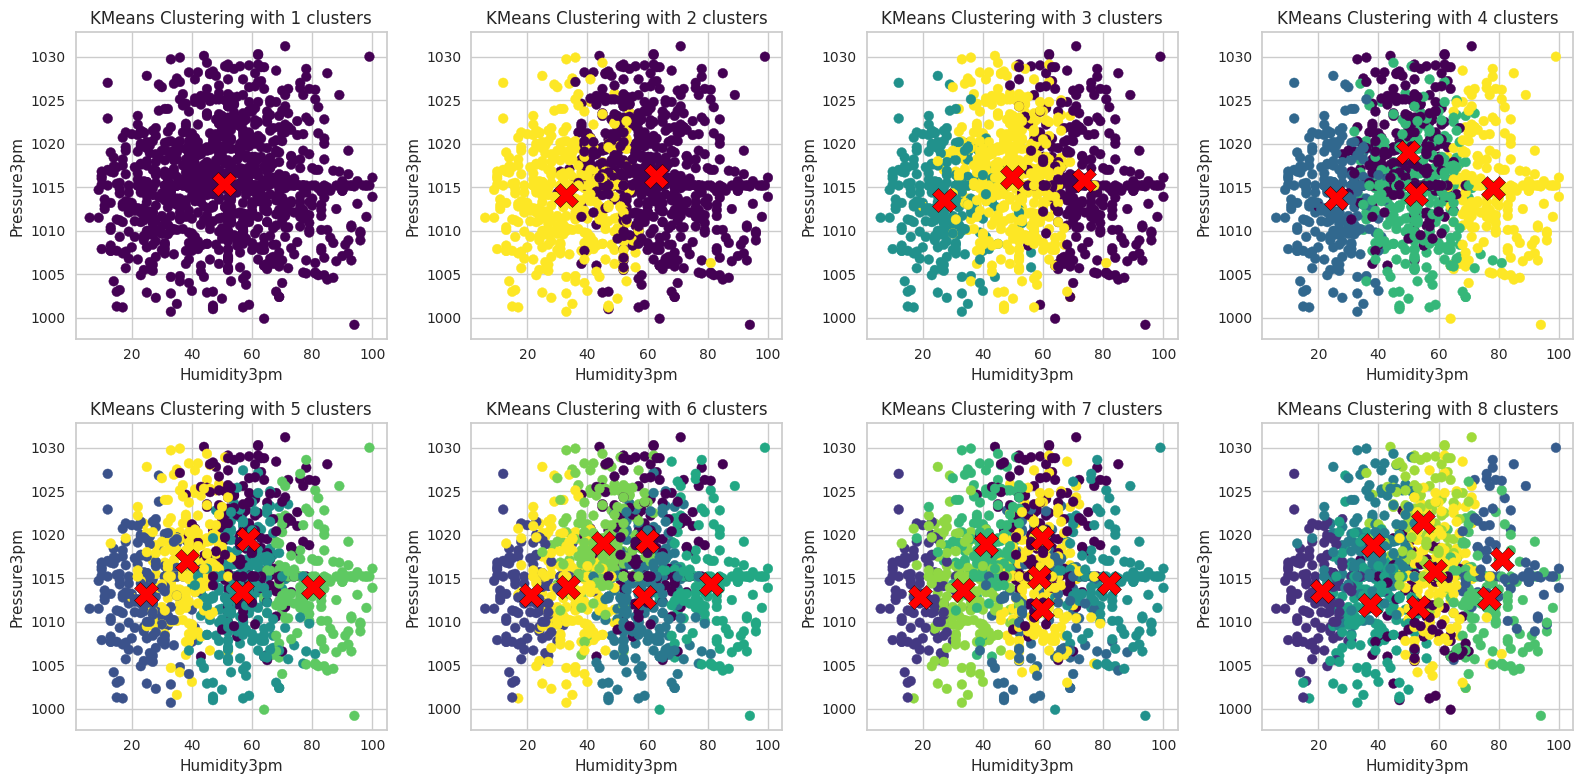

In [240]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for n_clusters, ax in zip(range(1, 9), axes.flatten()):
    k_model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = k_model.fit_predict(data_sample)

    

    ax.scatter(data_sample['Humidity3pm'], data_sample['Pressure3pm'], c=clusters, cmap='viridis')
    ax.set_title(f'KMeans Clustering with {n_clusters} clusters')
    ax.set_xlabel('Humidity3pm')
    ax.set_ylabel('Pressure3pm')
    centers = k_model.cluster_centers_
    ax.scatter(centers[:, 4], centers[:, 6], s=300, c='red', marker='X', edgecolor='black')
    
plt.tight_layout()
plt.show()


We can see that with upto 6 clusters there is still a clear distinction between the found clusters and their respective centroids.

#### Experimenting with different number of maximum iterations.

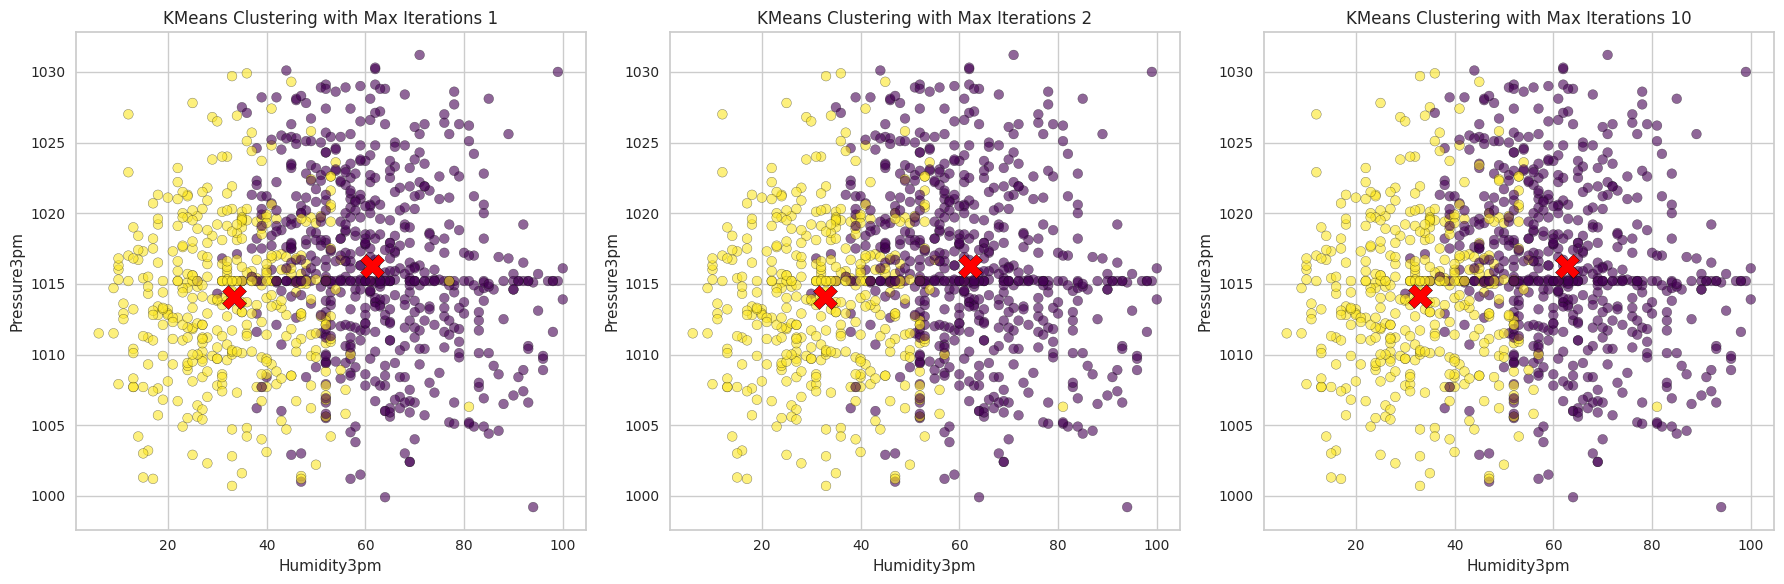

In [241]:
max_iterations = [1, 2, 10]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for idx, max_iter in enumerate(max_iterations):
    k_model = KMeans(n_clusters=2, max_iter=max_iter, random_state=42)
    clusters = k_model.fit_predict(data_sample)

    axes[idx].scatter(data_sample['Humidity3pm'], data_sample['Pressure3pm'], c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')

    centers = k_model.cluster_centers_
    axes[idx].scatter(centers[:, 4], centers[:, 6], s=300, c='red', marker='X', edgecolor='black')

    axes[idx].set_title(f'KMeans Clustering with Max Iterations {max_iter}')
    axes[idx].set_xlabel('Humidity3pm')
    axes[idx].set_ylabel('Pressure3pm')

plt.tight_layout()
plt.show()


When setting max iteration of the kmeans algorithm there is no visible difference.

# 4) Evaluation

### Justify the chosen k using the elbow curve graph (WCSS value comparison) or/and Silhouette score (only for the k-means algorithm).

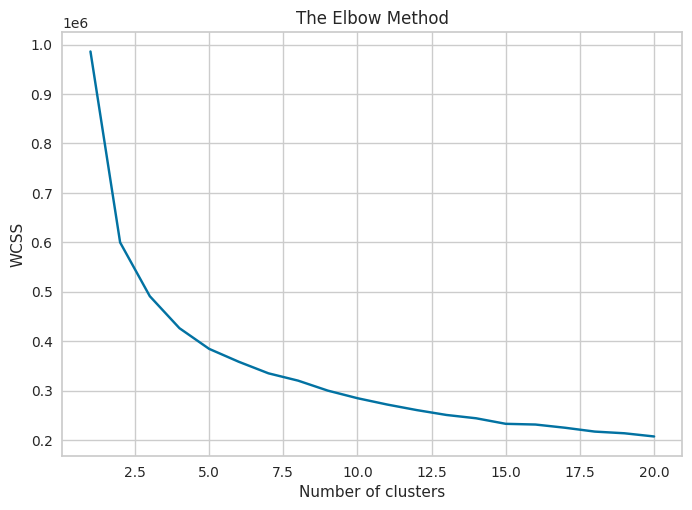

In [242]:
wcss = []
for i in range(1, 21): 
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data_sample)
    wcss.append(km.inertia_)

# Plot the WCSS to find the best k
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the elbow method the best number of clusters is 7.

For n_clusters (sample) = 2, the average silhouette_score is : 0.31737178174098346
For n_clusters (sample) = 3, the average silhouette_score is : 0.23423498007008647
For n_clusters (sample) = 4, the average silhouette_score is : 0.21883917166167924
For n_clusters (sample) = 5, the average silhouette_score is : 0.20041049448868128
For n_clusters (sample) = 6, the average silhouette_score is : 0.1759209691426804
For n_clusters (sample) = 7, the average silhouette_score is : 0.18013867316875168
For n_clusters (sample) = 8, the average silhouette_score is : 0.17501173344162083
For n_clusters (sample) = 9, the average silhouette_score is : 0.1763009190397692
For n_clusters (sample) = 10, the average silhouette_score is : 0.17499775317772476


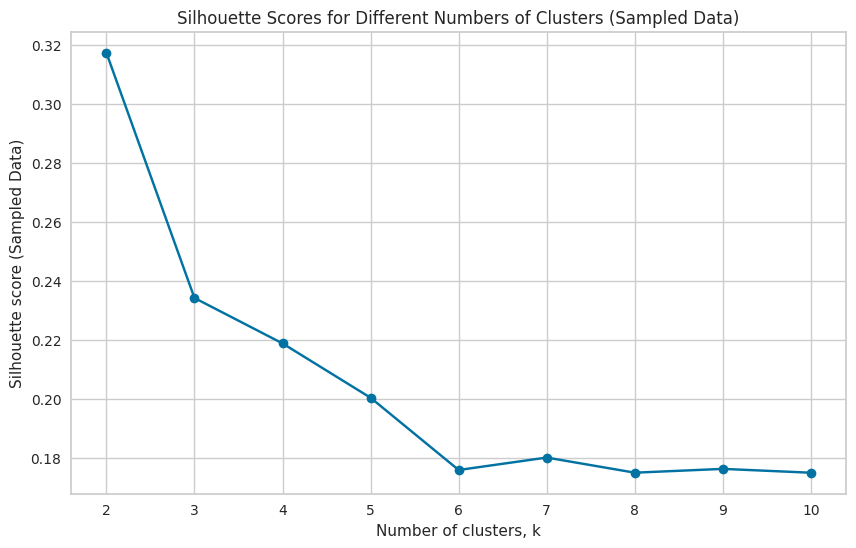

The best number of clusters based on silhouette score (sample) is 2


In [243]:
range_n_clusters = list(range(2, 11))

silhouette_scores_sample = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_sample = clusterer.fit_predict(data_sample)
    silhouette_avg_sample = silhouette_score(data_sample, cluster_labels_sample)
    silhouette_scores_sample.append(silhouette_avg_sample)
    print(f"For n_clusters (sample) = {n_clusters}, the average silhouette_score is : {silhouette_avg_sample}")

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_sample, marker='o', linestyle='-', color='b')
plt.title("Silhouette Scores for Different Numbers of Clusters (Sampled Data)")
plt.xlabel("Number of clusters, k")
plt.ylabel("Silhouette score (Sampled Data)")
plt.show()

best_k_sample = range_n_clusters[silhouette_scores_sample.index(max(silhouette_scores_sample))]
print(f"The best number of clusters based on silhouette score (sample) is {best_k_sample}")

Based on the Silhouette score  the optimal number of clusters is 2  (as the default model)

### Rand index

In [244]:
score = rand_score( k2_clusters, true_labels,)
print("Rand Index for the k2 model:", score)

Rand Index for the k2 model: 0.5183363363363364


In [245]:
score = rand_score( k7_clusters, true_labels,)
print("Rand Index for the k7 model:", score)

Rand Index for the k7 model: 0.48902702702702705


The results above are suggesting that the clustering patterns are not particularly strong.

#### Using most correlating features from classification task:

In [246]:
kmeans2Alt = KMeans(n_clusters=2, random_state=123, n_init=10)
data_shrinked = data_sample[["Humidity3pm","Pressure3pm"]]
k2Alt_clusters = kmeans2Alt.fit_predict(data_shrinked)
score = rand_score( k2Alt_clusters, true_labels)
print("Rand Index for the alternative k2 model:", score)

Rand Index for the alternative k2 model: 0.5387387387387388


In [247]:
kmeans7Alt = KMeans(n_clusters=7, random_state=123, n_init=10)
data_shrinked = data_sample[["Humidity3pm","Pressure3pm"]]
k7Alt_clusters = kmeans7Alt.fit_predict(data_shrinked)
score = rand_score( k7Alt_clusters, true_labels)
print("Rand Index for the alternative k7 model:", score)

Rand Index for the alternative k7 model: 0.4906166166166166


By choosing only the most important parameters we can see almost the same result.

# 5) Explanation

### Visualize cluster models

Dendrogram for hierarchical clustering:

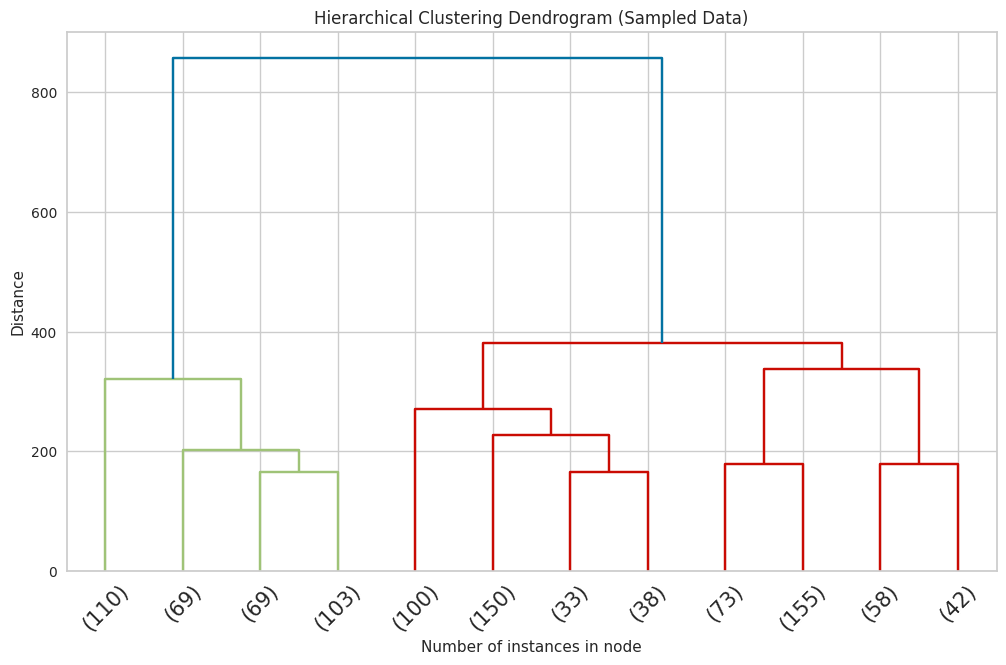

In [248]:
Z_sample = linkage(data_sample, 'ward')

plt.figure(figsize=(12, 7))
dendrogram(Z_sample,truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15.)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Number of instances in node')
plt.ylabel('Distance')
plt.show()

Scatter plot for the k-means model:

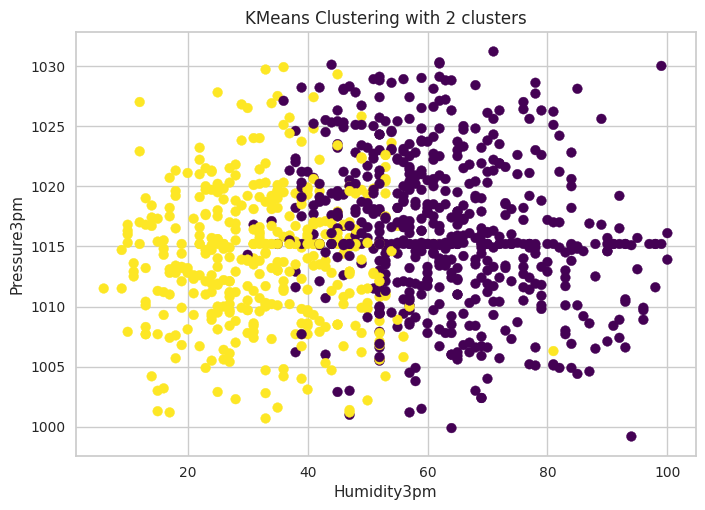

In [249]:
plt.scatter(data_sample['Humidity3pm'], data_sample['Pressure3pm'], c=k2_clusters, cmap='viridis')
plt.title(f'KMeans Clustering with 2 clusters')
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure3pm')
plt.show()

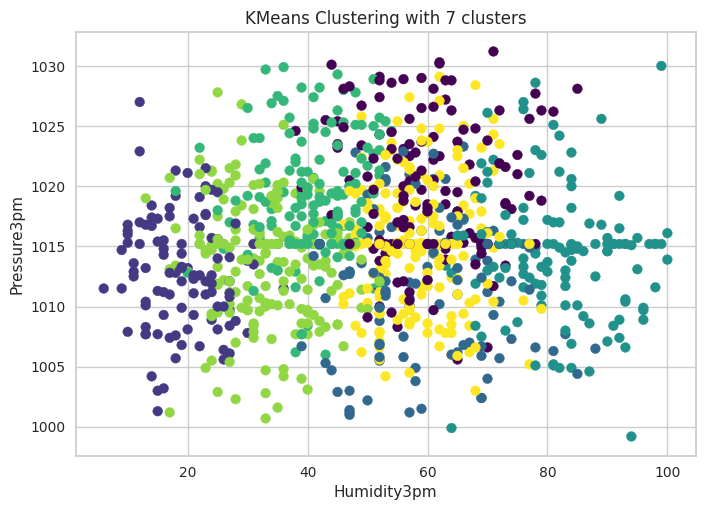

In [250]:
plt.scatter(data_sample['Humidity3pm'], data_sample['Pressure3pm'], c=k7_clusters, cmap='viridis')
plt.title(f'KMeans Clustering with 7 clusters')
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure3pm')
plt.show()

### Clusters and target variable

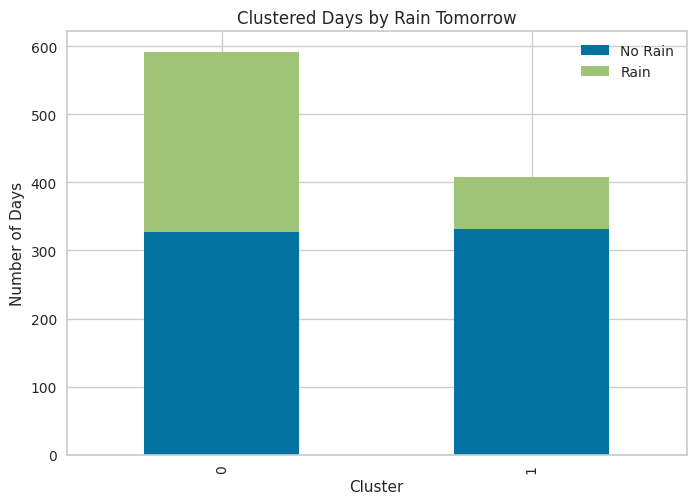

In [251]:
def plot_clusters_rain(clusters, true_labels):
    data_plus_cluster = pd.DataFrame({'Cluster': clusters, 'RainTomorrow': true_labels})
    
    cluster_rain_counts = data_plus_cluster.groupby(['Cluster', 'RainTomorrow']).size().unstack('RainTomorrow')
    
    ax = cluster_rain_counts.plot(kind='bar', stacked=True, title='Clustered Days by Rain Tomorrow')
    ax.legend(['No Rain', 'Rain'])
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Number of Days')
    
    plt.show()

plot_clusters_rain(k2_model.labels_, true_labels)


k2 model clusters do not distinct the target variable well, bothhave more instances of No Rain.

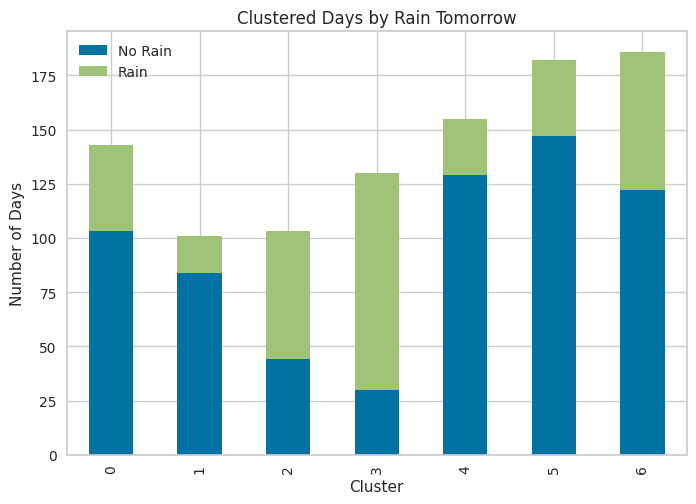

In [252]:
plot_clusters_rain(k7_model.labels_, true_labels)

Cluster 3 and 2 contain the majority of rain instances and the rest have the majority of no rain instances.

### Describing clusters

In [253]:
labels = k2_model.labels_
cluster_sizes = np.bincount(labels)

print("Cluster Sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} samples")

data_sample_eval['Cluster'] = k2_clusters

cluster_rain_probability = data_sample_eval.groupby('Cluster').mean()

cluster_rain_probability


Cluster Sizes:
Cluster 0: 592 samples
Cluster 1: 408 samples


MaxTemp  Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  \
Cluster                                                                 
0        21.170777  0.125845      36.785473    77.581081    62.711149   
1        27.377451  0.027696      42.017157    53.127451    32.897059   

         Pressure9am  Pressure3pm    Temp3pm  RainToday  RainTomorrow  
Cluster                                                                
0        1018.745608  1016.250845  19.413176        0.0      0.447635  
1        1017.319118  1014.152451  25.728922        0.0      0.186275

Cluster 0 has overall lower temperature values, higher rainfall and higher humidity.

In cluster 0 the probability is almost 45% whereas in cluster 1 the probability of rain tomorrow is 18,6%.

#### Selected instance assignment to a cluster

In [254]:
selected_instance_df_cl = selected_instance.to_frame().transpose()
selected_instance_df_cl['RainToday'] = selected_instance_df_cl['RainToday'].map({'Yes': 1, 'No': 0})
selected_instance_df_cl['RainTomorrow'] = selected_instance_df_cl['RainTomorrow'].map({'Yes': 1, 'No': 0})
selected_instance_df_cl

Date Location MinTemp MaxTemp Rainfall Evaporation Sunshine  \
121958  2012-03-12    Perth    15.8    40.6      0.0         9.2     11.3   

       WindGustDir WindGustSpeed WindDir9am  ... Humidity9am Humidity3pm  \
121958         WSW          31.0         NE  ...        28.0        28.0   

       Pressure9am Pressure3pm Cloud9am Cloud3pm Temp9am Temp3pm RainToday  \
121958      1008.0      1005.1      2.0      2.0    30.1    33.9         0   

       RainTomorrow  
121958            0  

[1 rows x 23 columns]

In [255]:
selected_instance_cl = selected_instance_df_cl.drop(columns=['WindDir9am', 'WindGustDir', 'WindDir3pm', 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Date', 'Location','Temp9am', 'MinTemp', 'WindSpeed9am', 'WindSpeed3pm'])

In [256]:
selected_instance_cl

MaxTemp Rainfall WindGustSpeed Humidity9am Humidity3pm Pressure9am  \
121958    40.6      0.0          31.0        28.0        28.0      1008.0   

       Pressure3pm Temp3pm  RainToday  RainTomorrow  
121958      1005.1    33.9          0             0

In [257]:
# Assign the instance to a cluster
assigned_cluster = k2_model.predict(selected_instance_cl.drop(columns='RainTomorrow'))[0]
print(f"Instance assigned to cluster: {assigned_cluster}")

# Check the mode of 'RainTomorrow' in the assigned cluster
mode_of_cluster = data_sample_eval[data_sample_eval['Cluster'] == assigned_cluster]['RainTomorrow'].mode()[0]
print(f"Most common value of 'RainTomorrow' in assigned cluster: {mode_of_cluster}")

# Compare the instance's 'RainTomorrow' value to the cluster's mode
instance_value = selected_instance_cl['RainTomorrow'].iloc[0]
print(f"Instance 'RainTomorrow' value: {instance_value}")
print(f"Does the instance's 'RainTomorrow' match the mode of the cluster? {'Yes' if instance_value == mode_of_cluster else 'No'}")


Instance assigned to cluster: 1
Most common value of 'RainTomorrow' in assigned cluster: 0.0
Instance 'RainTomorrow' value: 0
Does the instance's 'RainTomorrow' match the mode of the cluster? Yes


# Conclusion

In this data analysis project explored the dataset's inherent clustering through unsupervised learning methods. The results were as follows:

When delving into unsupervised learning with k-means clustering, the data was able to be segmented into meaningful clusters. Notably, a k-means model with 6 clusters identified a particular cluster in which the majority of instances corresponded to days with rain. This could indicate a pattern that encapsulates weather conditions typically leading to precipitation, which could be valuable for further insights into weather dynamics.

Overall, the machine learning task uncovered natural groupings within the data that could inform more nuanced analyses, such as targeted weather pattern studies or more sophisticated predictive algorithms incorporating cluster characteristics.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=deed7f0d-a515-4044-9481-d6bf562b64bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>